In [1]:
# https://www.semion.io/doc/statistical-mechanics-of-money


In [1]:
# Importar librerías científicas

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pylab import *
import matplotlib.animation as animation
import matplotlib.patches as mpatches

In [2]:
# Crear estilo de plots
# IPython_default = plt.rcParams.copy()

from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [3]:

    
def deltaDistribution(M,N):
    return np.ones(N)*M/N

def uniformDistribution(M,N,numClasses):
    
    G = int(N/numClasses)
    ags = []

    for l in range(G):
        for k in range(numClasses):
            ags.append(l)
    
    ags = np.array(ags)*M/np.sum(ags)
    return ags, np.max(ags)

# Function S takes an array of real numbers (i.e. the amount of money each agent has) and calculates entropy
def S(agents, numClasses, mMax):
    frequencies, binEdges = np.histogram(agents, bins=numClasses, range=[0,mMax])
    agents = np.array(agents)
    positiveFrequencies = frequencies[frequencies > 0]
    return N*np.log(N) - np.sum(positiveFrequencies*np.log(positiveFrequencies)) 

def O1_a(M):
    return 0.001*M

def O1_b(M):
    return 1 - np.exp(-0.001*M)

def O(agents, numClasses,mMax, func):
    frequencies = np.histogram(agents, bins=numClasses, range=[0,mMax])
    frequencies, binEdges = np.histogram(agents, bins=numClasses, range=[0,mMax])
    summation = 0
    for k in range(len(binEdges)-1):
        frequency = frequencies[k]
        ags = np.array(agents).copy()
        ags = ags[ags >= binEdges[k]]
        ags = ags[ags < binEdges[k+1]]
        Mk = 0
        Mk = np.sum(ags)
        summation += frequency*func(Mk)
        
    return summation
    
def isList(someList):
    if type(someList) == list or type(someList) == np.ndarray:
        return True
    else:
        return False
    

In [4]:
# Definir clases y funciones necesarias
class System(object):
    def __init__(self, agents, deltam):
        self.M = np.sum(agents) #static
        self.N = len(agents) #static
        self.deltam = deltam #static
        
        self.agents = agents #dynamic
        self.iterations = 0 #dynamic
        self.transactions = 0 #dynamic

    def getAgents(self):
        return self.agents
    
    def setAgents(self,agents):
        self.agents = agents
        
    def getIterations(self):
        return self.iterations
    
    def setIterations(self, iterations):
        self.iterations = iterations
        
    def getTransactions(self):
        return self.transactions
    
    def setTransactions(self,transactions):
        self.transactions = transactions
        
    def iterate(self, times=1):
        
        indices = np.arange(0,self.N)
        
        for iteration in range(times):
            for k in range(len(self.agents)):
                l = np.random.choice(indices, 1)
                self.simulateTransaction(k,l)
            self.iterations += 1

        
    def simulateTransaction(self,k,l):
                    
        auxAgents = self.getAgents().copy()
        auxDeltam = self.deltam
        mny = auxAgents[l].copy() - auxDeltam
        
        if(mny >= 0):
            auxAgents[k] = auxAgents[k] + auxDeltam
            auxAgents[l] = auxAgents[l] - auxDeltam
            self.transactions += 1
            
        self.setAgents(auxAgents)
            
    def getEntropy(self,numClasses, mMax):
        return S(self.agents, numClasses, mMax)
    
    def getRichestAgent(self):
        return np.max(self.agents)
    
    def getWellness(self, numClasses, mMax,func):
        return O(self.agents, numClasses,mMax, func)

In [5]:
# This class will act as a storage variable for the historic agents data
class Evolution(object):
    def __init__(self, system):
        self.system = system #dynamic
        
        self.historicAgents = [system.agents] #dynamic
        self.historicTransactions = [0] #dynamic
        
    def getHistoricAgents(self):
        return self.historicAgents
    
    def setHistoricAgents(self,historicAgents):
        self.historicAgents = historicAgents
        
    def getHistoricTransactions(self):
        return self.historicTransactions
    
    def setHistoricTransactions(self, historicTransactions):
        self.historicTransactions = historicTransactions
        
    def run(self, snapshots, iterations = 1):
        historicAgentsAux = self.historicAgents.copy()
        historicTransactionsAux = self.historicTransactions.copy()
        system = self.system
        
        for i in range(snapshots):
            system.iterate(iterations)
            historicAgentsAux.append(system.getAgents())
            historicTransactionsAux.append(system.getTransactions())
            
        self.setHistoricAgents(historicAgentsAux)
        self.setHistoricTransactions(historicTransactionsAux)
        

        



In [6]:
# Simulations is an evolution but with the capacity calculating the historic annexe data, which is entropy and wellness
class SystemSimulation(Evolution):
    def __init__(self, system, args = {'C' : 20, 'mMax' : 10}):
        
        super().__init__(system)
        
        self.C = args['C']
        self.mMax = args['mMax']
        
        self.historicEntropy = []
        self.historicWellness = []
        
    # C {get; set;}
    def getC(self):
        return self.C
    
    def setC(self,C):
        self.C = C
        
    # mMax {get; set;}
    def getMMax(self):
        return self.mMax
    
    def setMMax(self,mMax):
        self.mMax = mMax
        
    # Entropy {get; set;}
    def getHistoricEntropy(self):
        return self.historicEntropy
    
    def setHistoricEntropy(self,historicEntropy):
        self.historicEntropy = historicEntropy
        
    # Wellness {get; set;}
    def getHistoricWellness(self):
        return self.historicWellness
    
    def setHistoricWellness(self, historicWellness):
        self.historicWellness = historicWellness
        
        
        
    # this method runs the evolution and plus calculates entropy and wellnes if desired
    def runSimulation(self,snapshots, O1 = None):

        self.run(snapshots)
        
        historicEntropy, historicWellness = self.calculateHistoricAnnexeData(O1)
        self.setHistoricEntropy(historicEntropy)
        self.setHistoricWellness(historicWellness)
        
    def resetHistoricAnnexeData(self, C, mMax, O1 = None):
        historicEntropy, historicWellness = self.recalculateHistoricAnnexeData(C,mMax,O1)
        self.setHistoricEntropy(historicEntropy)
        self.setHistoricWellness(historicWellness)
        
        
    def resetHistoricWellness(self,O1):
        C = self.getC()
        mMax = self.getMMax()
        self.resetHistoricAnnexeData( C, mMax, O1)
        
    
    def calculateHistoricAnnexeData(self, O1 = None):
        historicEntropy = self.calculateHistoricEntropy()

        if O1 != None:  
            historicWellness = self.calculateHistoricWellness(O1)
            return historicEntropy, historicWellness
        else:
            return historicEntropy, None
        
    # this method redoes the entropy and wellness calculations without affecting the historicagents data
    def recalculateHistoricAnnexeData(self,C,mMax,O1 = None):
        
        self.setC(C)
        self.setMMax(mMax)
        
        historicEntropy, historicWellness = self.calculateHistoricAnnexeData( O1)

        return historicEntropy, historicWellness
       
        
    def calculateHistoricEntropy(self):
        entropies = []
        C = self.C
        mMax = self.mMax
        for agents in self.historicAgents:
            entropies.append(S(agents,C,mMax))
            
        return entropies
        
    def calculateHistoricWellness(self, O1):
        wellnesses = []
        C = self.getC()
        mMax = self.getMMax()
        for agents in self.getHistoricAgents():
            wellnesses.append(O(agents,C,mMax,O1))
        
        return wellnesses
    
    def getHistoricData(self):
        return self.getHistoricAgents(), self.getHistoricTransactions(), self.getHistoricEntropy(), self.getHistoricWellness()
        


In [7]:
# Simulations is an evolution but with the capacity of creating the initial agents array and run the historic plot of variables
class DeltaSimulation(SystemSimulation):
    def __init__(self, args = {'M' : 10000, 'N' : 5000, 'deltam' : 0.5, 'C' : 20, 'mMax' : 10}):
        
        M = args['M']
        N = args['N']
        deltam = args['deltam']
        
        agents = deltaDistribution(M,N)
        sys = System(agents,deltam)
        
        super().__init__(sys, {'C' : args['C'], 'mMax' : args['mMax']})
        


In [8]:
# Simulations is an evolution but with the capacity of creating the initial agents array and run the historic plot of variables
class UniformSimulation(SystemSimulation):
    def __init__(self, args = {'M' : 10000, 'N' : 5000, 'deltam' : 0.5, 'C' : 20}):
        
        M = args['M']
        N = args['N']
        deltam = args['deltam']
        C = args['C']

        
        agents, mMax = uniformDistribution(M,N,C)
        sys = System(agents,deltam)
        
        
        super().__init__(sys, {'C' : C, 'mMax' : mMax})

In [9]:
def deploySimulationPlot(sysSimulation):
    def plotStateEvolutionFunction(index):
    
        if index > len(historicTransactions)-1:
            return
        hagents = historicAgents[index]
        htransactions = historicTransactions[:index+1]
        hentropy = historicEntropy[:index+1]

        if isList(historicWellness):
            hwellness = np.array(historicWellness[:index+1])
        else:
            hwellness = None

        totalTransactions = historicTransactions[-1]
        C = sysSimulation.getC()
        mMax = sysSimulation.getMMax()   
        M = sysSimulation.system.M
        N = sysSimulation.system.N

        data = {
            'M' : M,      # total amount of money in system
            'N' : N,       # number of agents
            'C' : C,         # number of classes
            'mMax' : mMax,
            'totalTransactions' : totalTransactions
        }

        plotState(hagents, htransactions, hentropy, hwellness, data)


    def plotState(agents, transactions, entropy, wellness, data):

        # ax is the variable where simulations are going to be graphed
        # these figures should already exist when executing this function
        for ax in (ax1,ax2):
            ax.cla()


        M  = data["M"]
        N  = data['N']
        C  = data['C']
        mMax  = data['mMax']
        totalTransactions  = data['totalTransactions']
        progress = np.round(int(transactions[-1])*100/int(totalTransactions),4)
        currS = np.round(entropy[-1],4)

        if isList(wellness):
            currO = np.round(wellness[-1],4)
        else:
            currO = 0

        titleContent = "Statistical Mechanics of Money \n"
        titleContent += "\n"    
        titleContent += "Total transactions: " + str(totalTransactions) + "\n"
        titleContent += "M = " + str(M) + " (money units)   |    N = " + str(N) + " (people) \n"
        titleContent += "Progress: " + str(progress) + "%"

        plt.suptitle(titleContent);
        plt.subplots_adjust(top=0.77);
        plt.subplots_adjust(bottom=0.1)
        fig.subplots_adjust(hspace=0.5)
        fig.subplots_adjust(wspace=0.7)

        # Start subplots
        ax1.set_title('Agents histogram')
        ax1.set_xlabel('[money units]')
        ax1.set_ylabel('[frequency]')
        ax1.hist(agents, bins=C, range=[0,mMax])

        ax2.set_title('Agents histogram (semi-log)')
        ax2.set_xlabel('[money units]')
        ax2.set_ylabel('[frequency]')
        ax2.hist(agents, bins=C, range=[0,mMax])   
        ax2.set_yscale('log')

        ax3.set_title("Current entropy: S = " + str(currS))
        ax3.set_xlabel('[transactions]')
        ax3.set_ylabel('S')
        ax3.plot(transactions,entropy, 'm')

        if isList(wellness):
            ax4.set_title("Wellness: O = " + str(currO))
            ax4.set_xlabel('[transactions]')
            ax4.set_ylabel('O(Mk)')
            ax4.plot(transactions,wellness, 'm')
            
    historicAgents, historicTransactions, historicEntropy, historicWellness = sysSimulation.getHistoricData()

    %matplotlib notebook

    fig = plt.figure(figsize=(9.8,7))
    gs = fig.add_gridspec(2, 4)

    ax1 = fig.add_subplot(gs[0, :2])
    ax2 = fig.add_subplot(gs[0, -2:])

    if isList(historicWellness):
        ax3 = fig.add_subplot(gs[1, :2])
        ax4 = fig.add_subplot(gs[1, -2:])
    else: 
        ax3 = fig.add_subplot(gs[1, 1:3])
        
    anim = animation.FuncAnimation(fig, plotStateEvolutionFunction, interval=50, repeat=True, save_count=200)
    return anim

In [10]:
# Declarations end here

In [11]:
M = 10000
N = 5000
deltam = 0.5
C = 20

In [12]:
# DIRAC DELTA DISTRIBUTION

args = {
    'M' : M,      # total amount of money in system
    'N' : N,       # number of agents
    'deltam' : deltam,   # amount of money exchanged in each transaction
    'C' : C,         # number of classes
    'mMax' : 10
}

deltaSimulation = DeltaSimulation(args)

In [16]:
# DELTA DISTRIBUTION SIMULATION
snapshots = 100
iterations = 1
deltaSimulation.runSimulation(snapshots)


In [17]:
# RESET IF NEEDED
mMax = 10
deltaSimulation.resetHistoricAnnexeData(C,mMax)
deltaSimulation.setMMax(mMax)

<IPython.core.display.Javascript object>


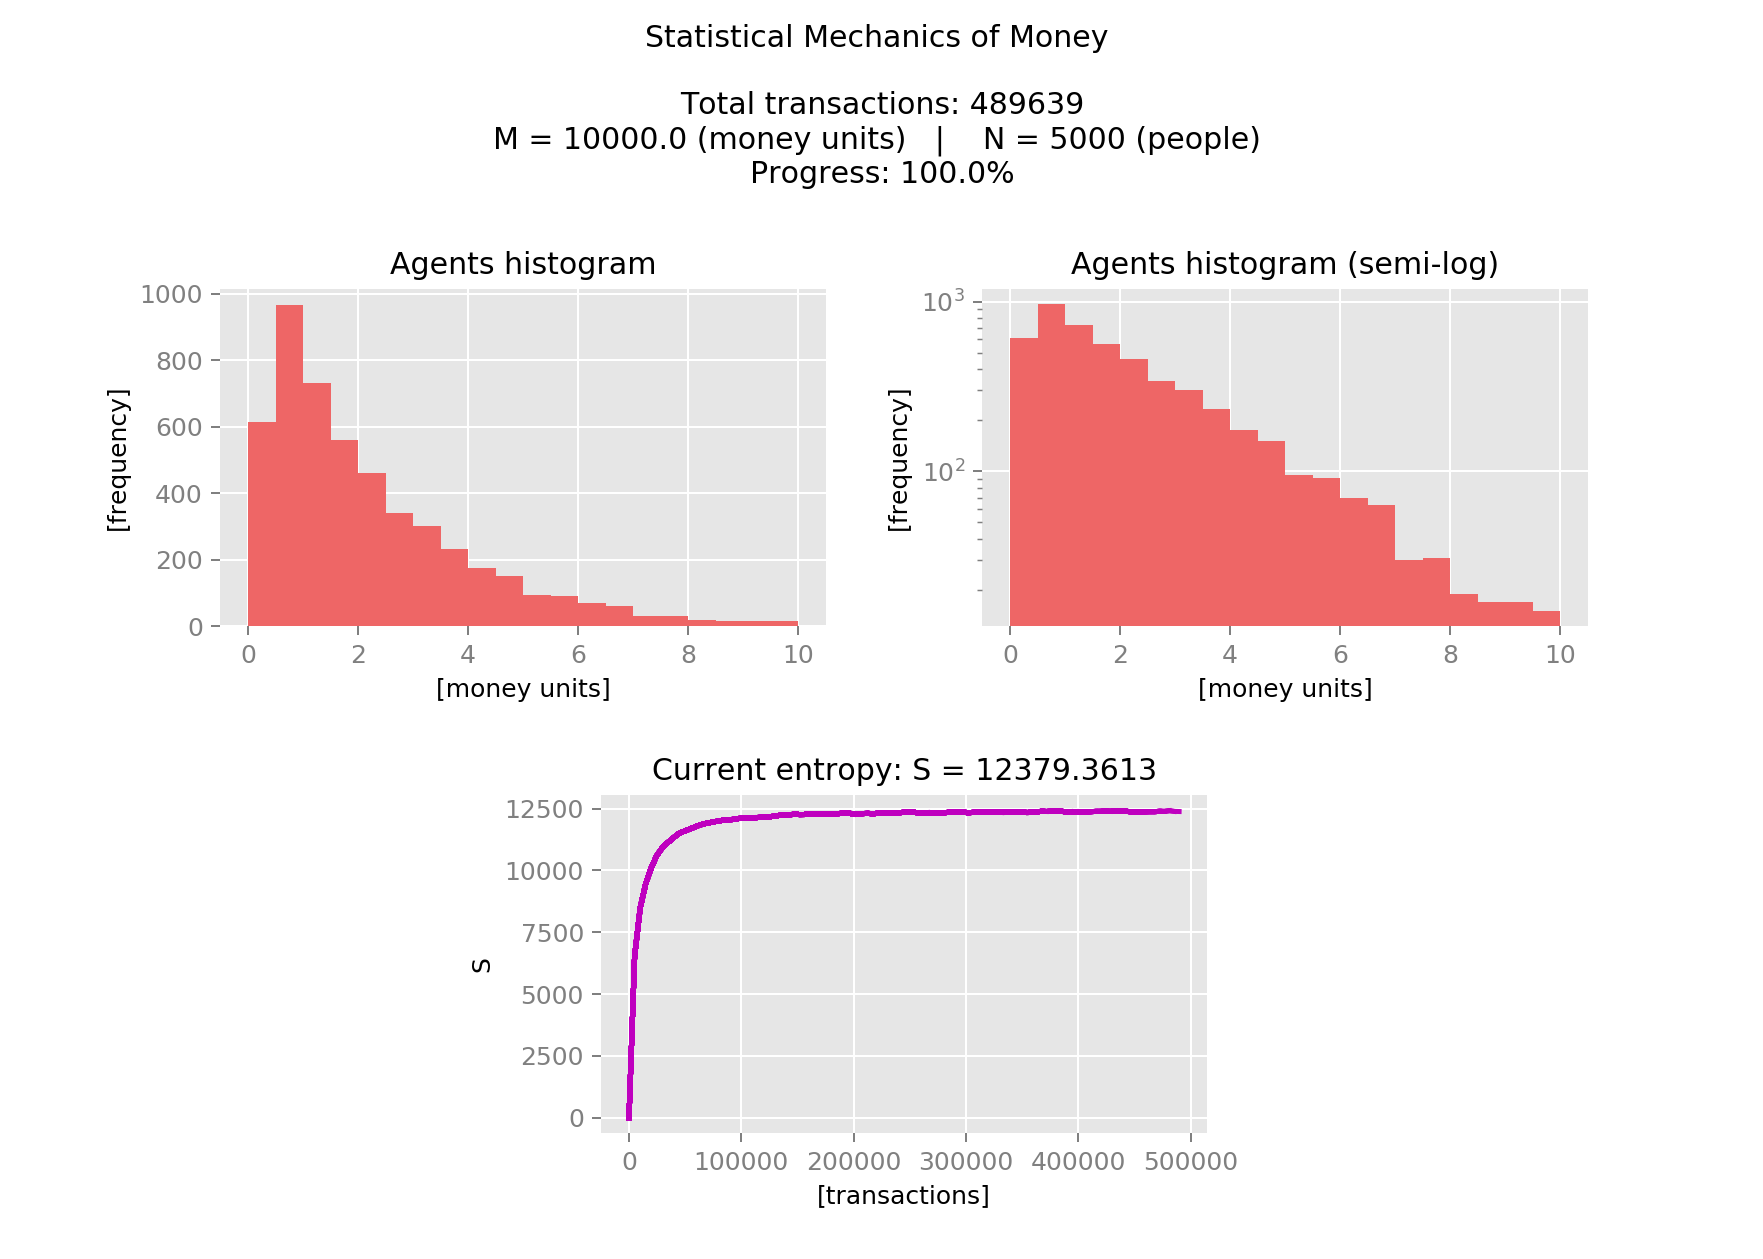

In [20]:
# DELTA DISTRIBUTION ANIMATION PLOT
anim = deploySimulationPlot(deltaSimulation)


In [45]:
# DELTA DISTRIBUTION WITH DIFFERENT MAX CLASS SIMULATION
mMax = 8
deltaSimulation.resetHistoricAnnexeData(C,mMax)
deltaSimulation.setMMax(mMax)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


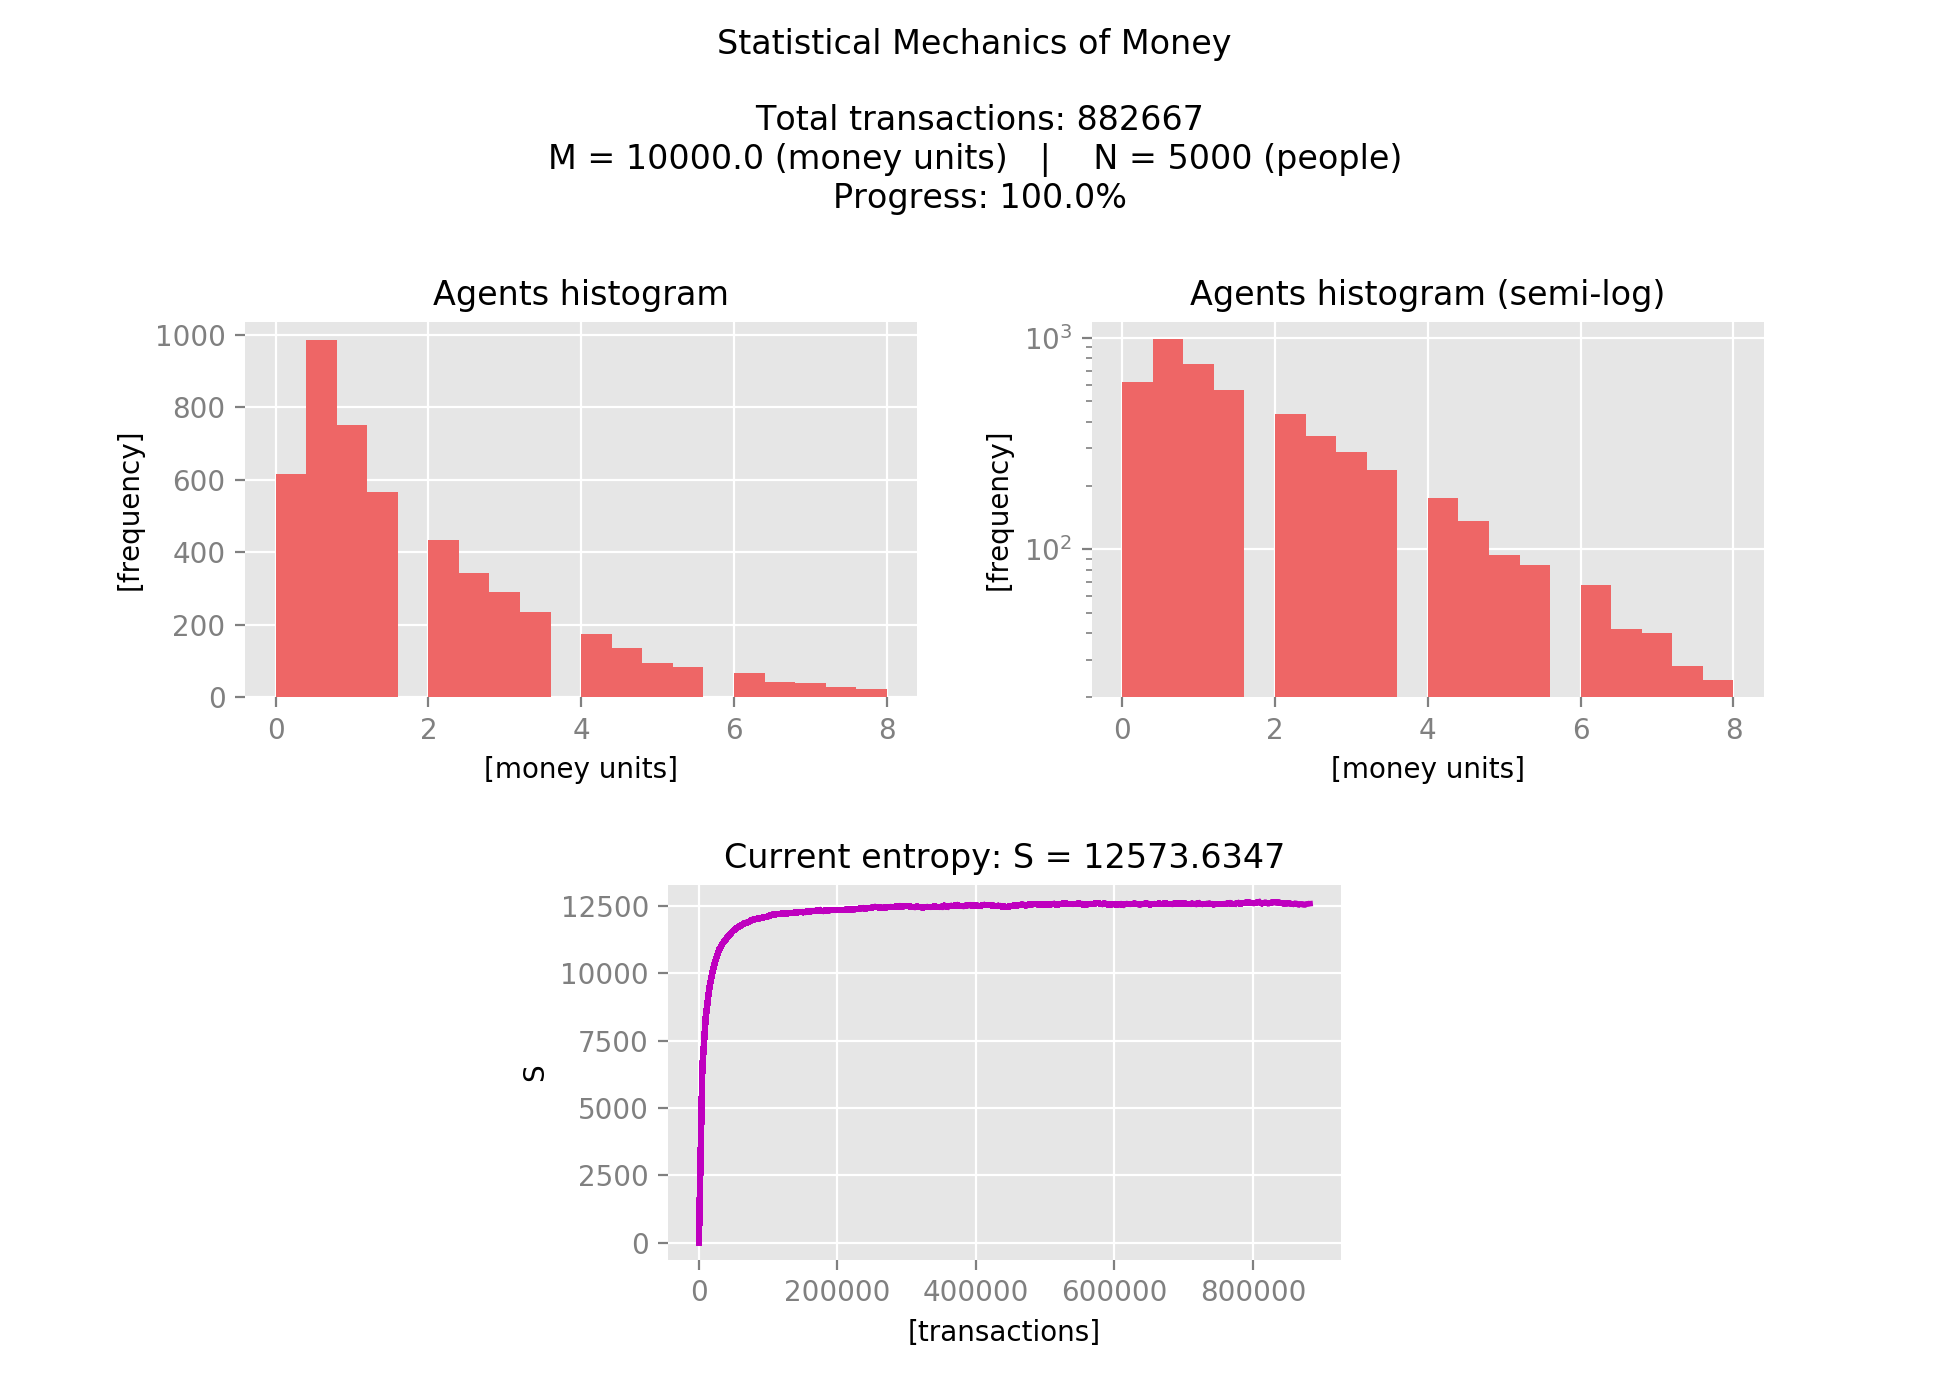

In [46]:
# DELTA DISTRIBUTION ANIMATION WITH DIFFERENT MAX CLASS PLOT 
anim = deploySimulationPlot(deltaSimulation)

In [22]:
# UNIFORM DISTRIBUTION
args = {
    'M' : M,      # total amount of money in system
    'N' : N,       # number of agents
    'deltam' : deltam,   # amount of money exchanged in each transaction
    'C' : C         # number of classes
}

uniformSimulation = UniformSimulation(args)



In [23]:
# UNIFORM DISTRIBUTION SIMULATION
snapshots = 200
iterations = 1
uniformSimulation.runSimulation(snapshots)


In [43]:
# RESET IF NEEDED
mMax = 4
uniformSimulation.resetHistoricAnnexeData(C,mMax)
uniformSimulation.setMMax(mMax)

<IPython.core.display.Javascript object>


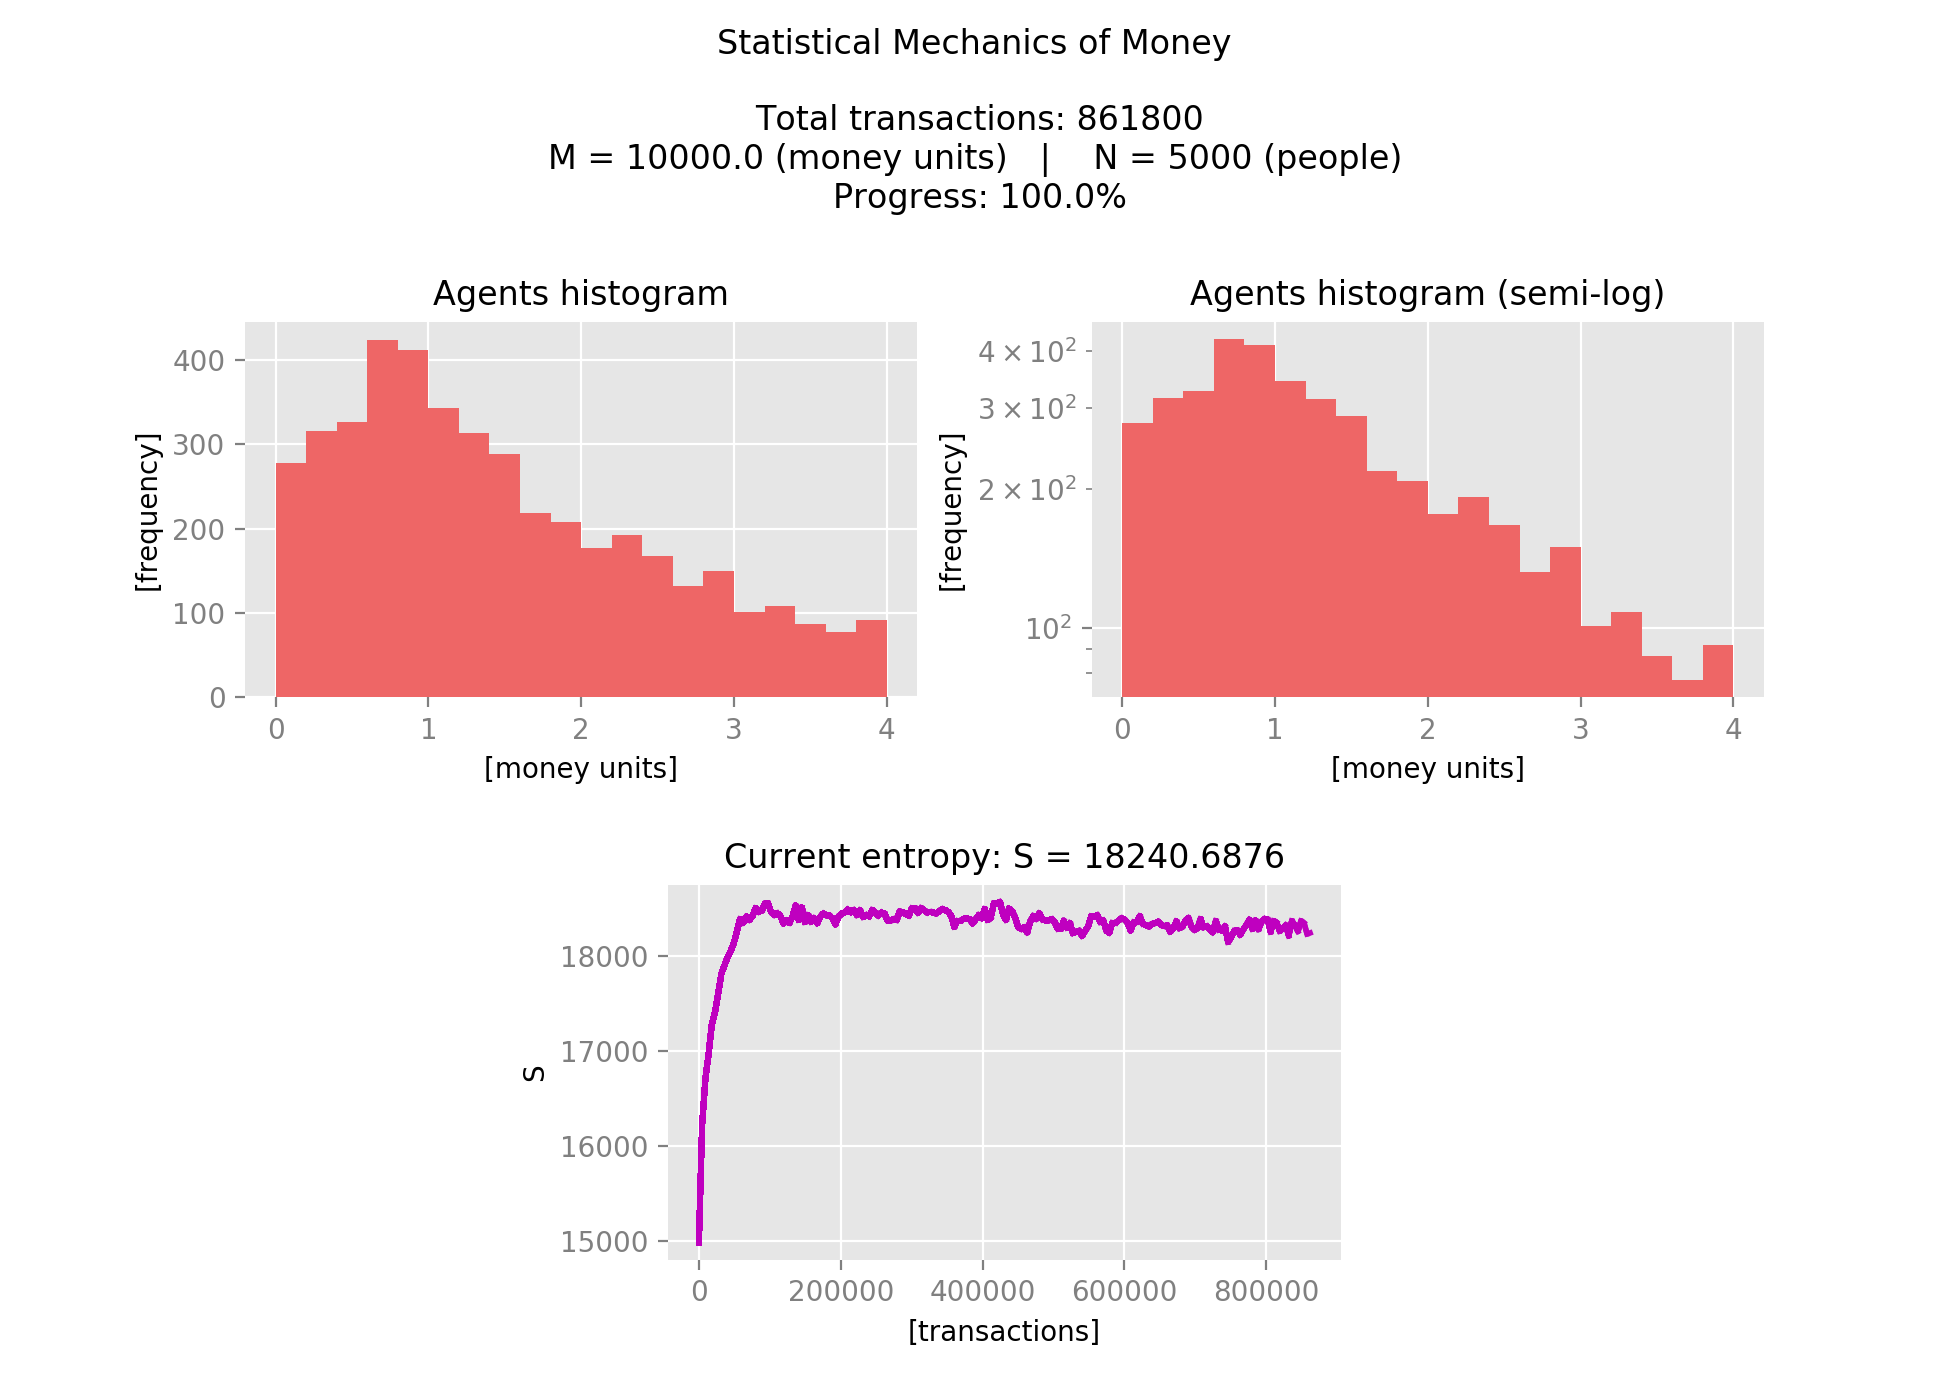

In [44]:
# UNIFORM DISTRIBUTION ANIMATION PLOT

deploySimulationPlot(uniformSimulation)

In [47]:
# UNIFORM DISTRIBUTION WITH DIFFERENT MAX CLASS SIMULATION
mMax = 8
uniformSimulation.resetHistoricAnnexeData(C,mMax)
uniformSimulation.setMMax(mMax)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


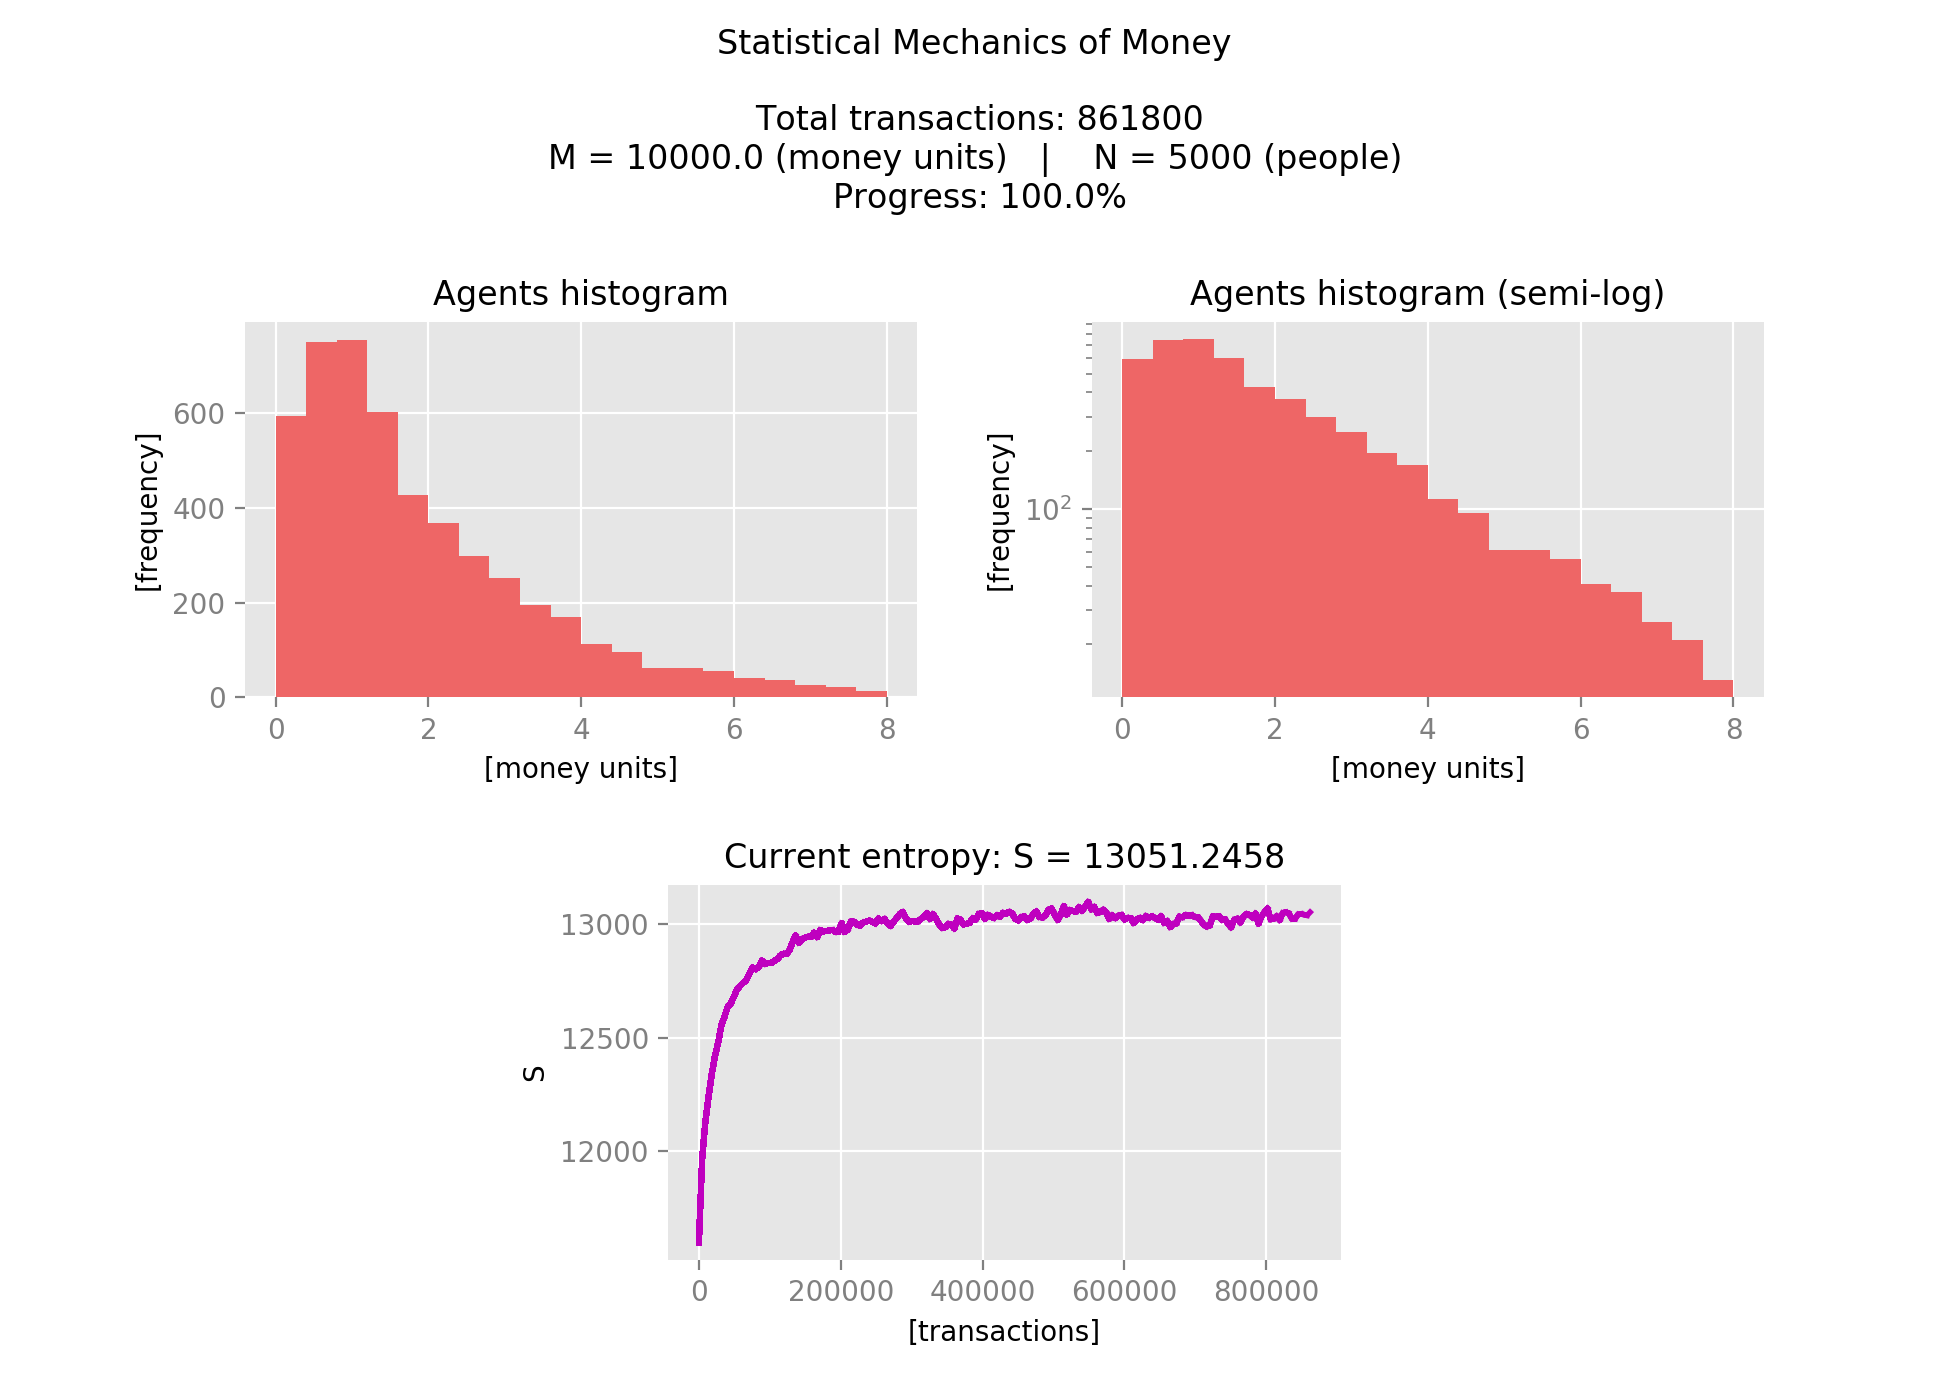

In [48]:
# UNIFORM DISTRIBUTION ANIMATION WITH DIFFERENT MAX CLASS PLOT 
anim = deploySimulationPlot(uniformSimulation)

In [49]:
# DIRAC DELTA DISTRIBUTION WITH DIFFERENT deltam

args = {
    'M' : M,      # total amount of money in system
    'N' : N,       # number of agents
    'deltam' : 0.25,   # amount of money exchanged in each transaction
    'C' : C,         # number of classes
    'mMax' : 10
}

deltaSimulationBETA = DeltaSimulation(args)

# UNIFORM DISTRIBUTION WITH DIFFERENT deltam
args = {
    'M' : M,      # total amount of money in system
    'N' : N,       # number of agents
    'deltam' : 0.25,   # amount of money exchanged in each transaction
    'C' : C         # number of classes
}

uniformSimulationBETA = UniformSimulation(args)

# DELTA AND UNIFORM DISTRIBUTION SIMULATION
snapshots = 200
iterations = 1

deltaSimulationBETA.runSimulation(snapshots)
uniformSimulationBETA.runSimulation(snapshots)

# RESET VALUES OF STARTER UNIFORM AND DELTA SIMULATIONS

deltaSimulation.resetHistoricAnnexeData(C,10)
deltaSimulation.setMMax(10)
uniformSimulation.resetHistoricAnnexeData(C,4)
uniformSimulation.setMMax(4)


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


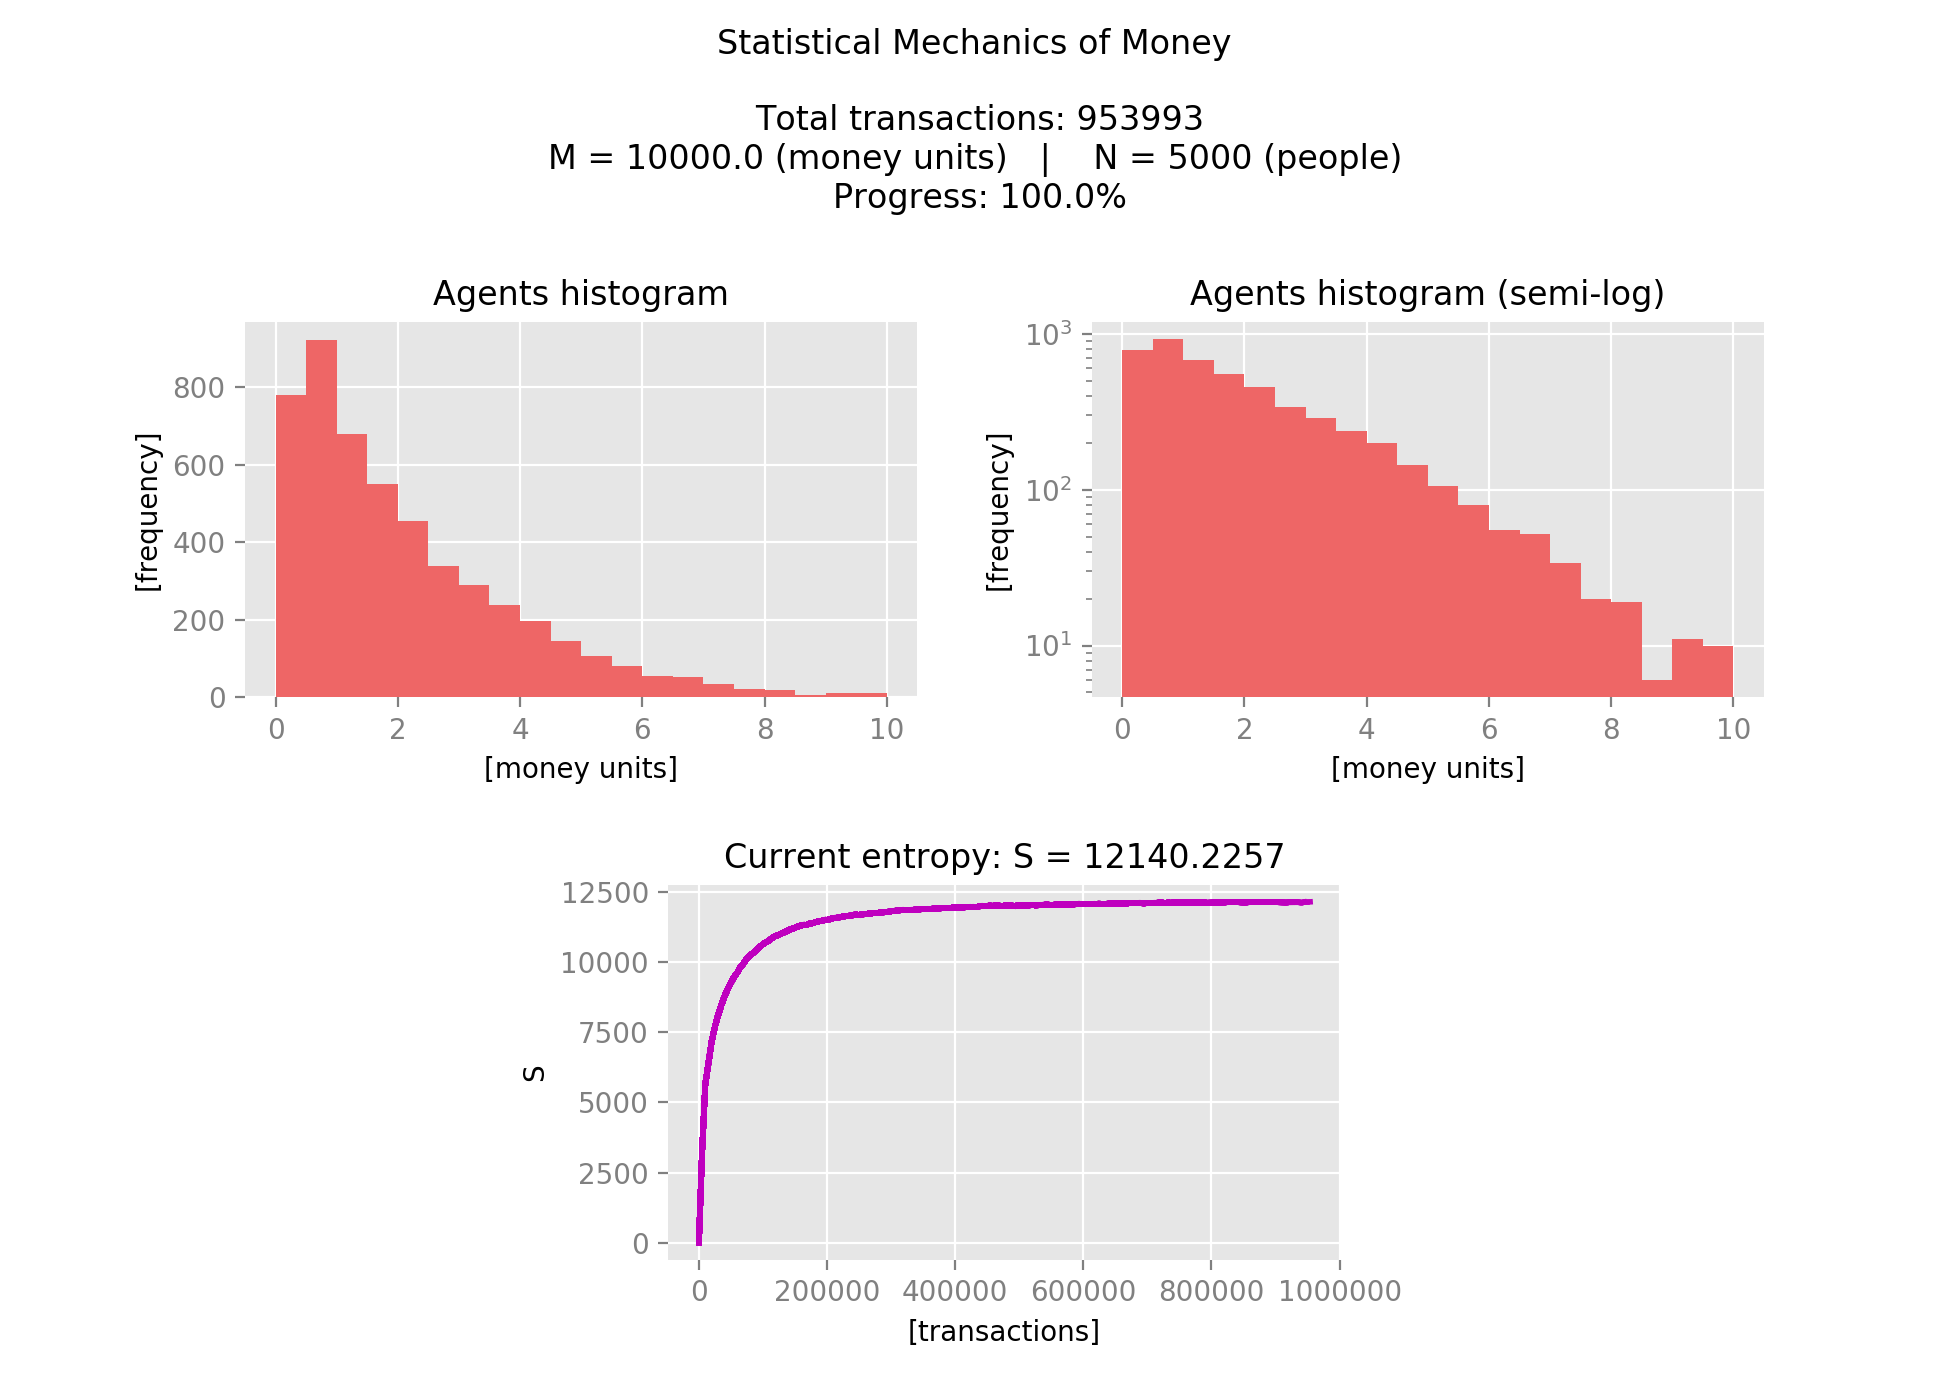

In [50]:
# DELTA DISTRIBUTION ANIMATION WITH DIFFERENT deltam
anim = deploySimulationPlot(deltaSimulationBETA)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


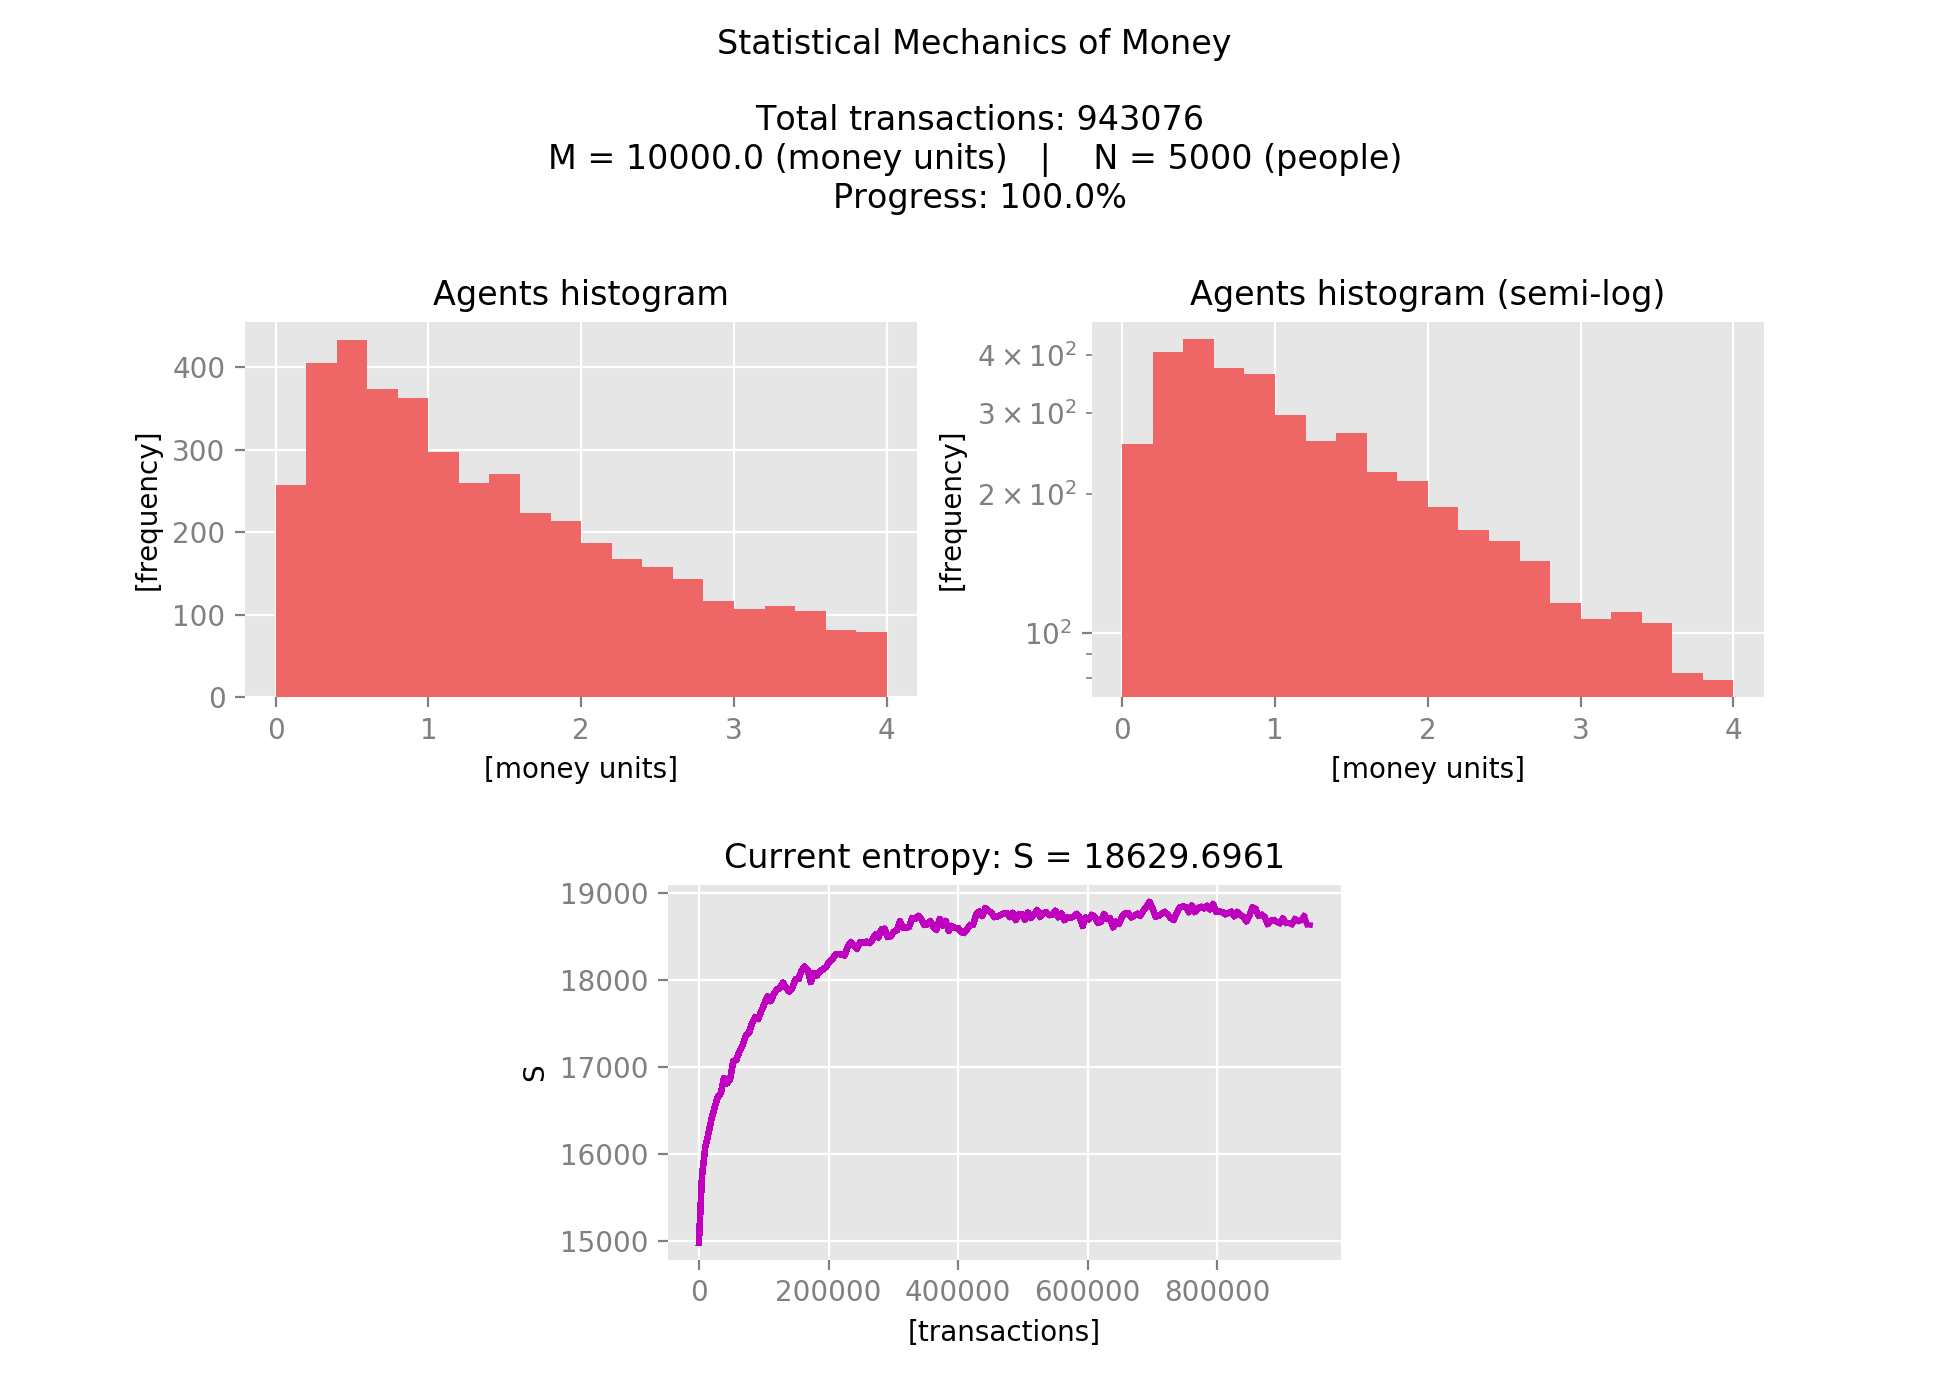

In [51]:
# UNIFORM DISTRIBUTION ANIMATION WITH DIFFERENT deltam
anim = deploySimulationPlot(uniformSimulationBETA)

In [52]:
# COMPARE ENTROPIES

deltaS = deltaSimulation.getHistoricEntropy()
uniformS = uniformSimulation.getHistoricEntropy()
deltaSBETA = deltaSimulationBETA.getHistoricEntropy()
uniformSBETA = uniformSimulationBETA.getHistoricEntropy()

In [25]:
# COMPARE ENTROPIES

fig = plt.figure(figsize=(9,7))
plt.plot(deltaS,color='steelblue')
plt.plot(uniformS,color='g')
plt.plot(deltaSBETA,color='m')
plt.plot(uniformSBETA,color='y')
plt.ylabel('S')
plt.xlabel('[iterations]')
plt.title('Comparison between entropies')

import matplotlib.patches as mpatches

S1_patch = mpatches.Patch(color='steelblue', label='Initial delta distribution - deltam = 0.5')
S2_patch = mpatches.Patch(color='g', label='Initial uniform distribution - deltam = 0.5')
S3_patch = mpatches.Patch(color='m', label='Initial delta distribution - deltam = 0.25')
S4_patch = mpatches.Patch(color='y', label='Initial uniform distribution - deltam = 0.25')
plt.legend(handles=[S1_patch,S2_patch,S3_patch,S4_patch])

# plt.plot(arrTransactions, deltaEntropies)
# blue_patch = mpatches.Patch(color='steelblue',label='Initial Dirac delta distribution')
# plt.legend(handles=[red_patch,blue_patch])

plt.title('Entropy')

plt.show()

NameError: name 'deltaS' is not defined

<Figure size 648x504 with 0 Axes>

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


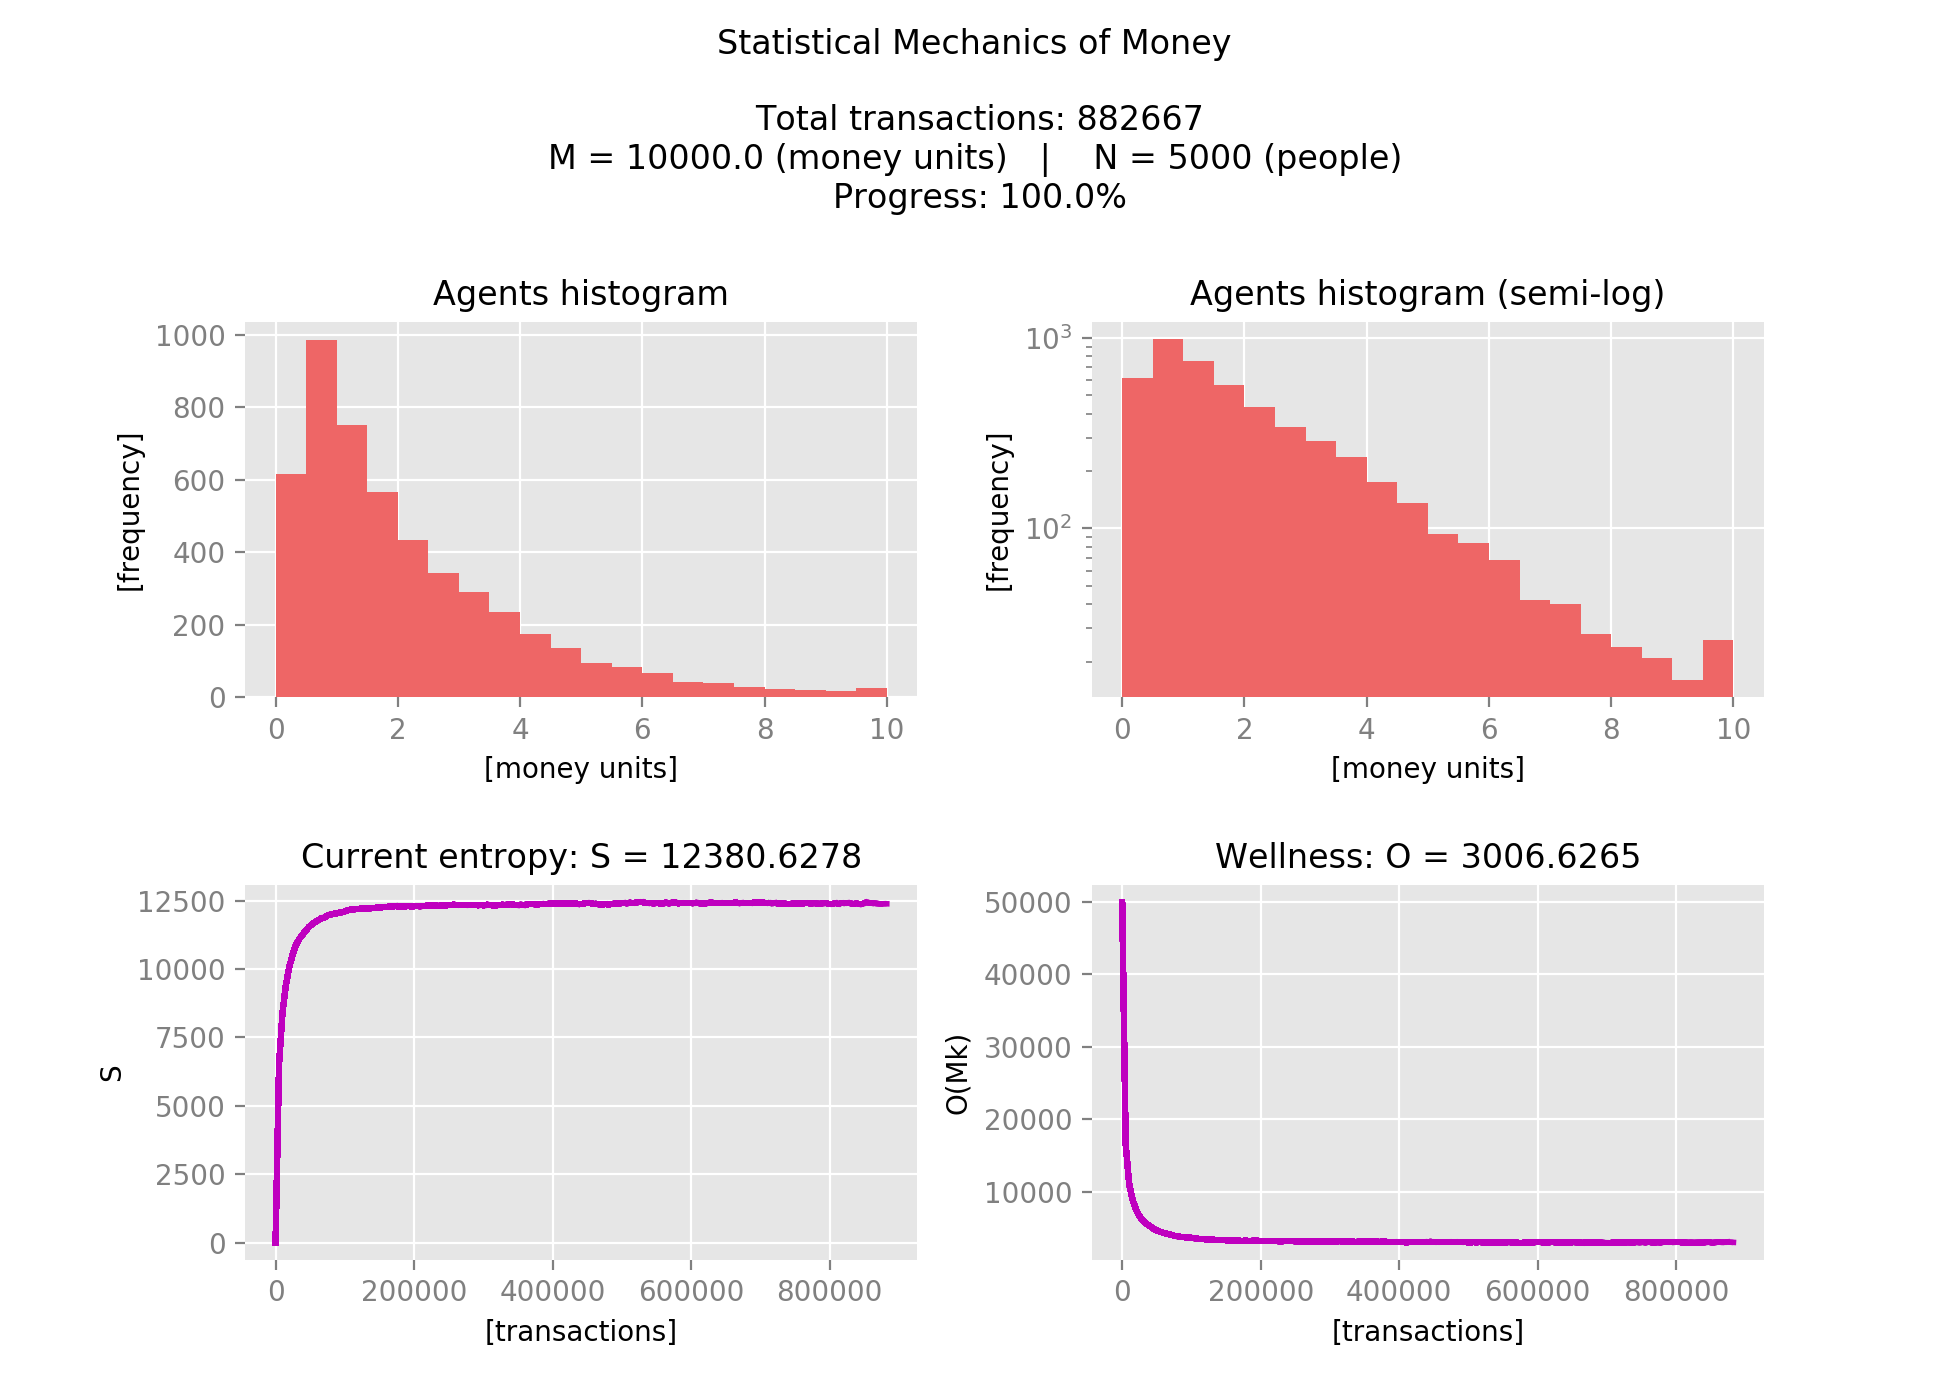

In [69]:
# WELLNESS FUNCTION - DELTA DISTRIBUTION A

mMax = 10
deltaSimulation.resetHistoricAnnexeData(C,mMax, O1_a)
deltaSimulation.setMMax(mMax)
deploySimulationPlot(deltaSimulation)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


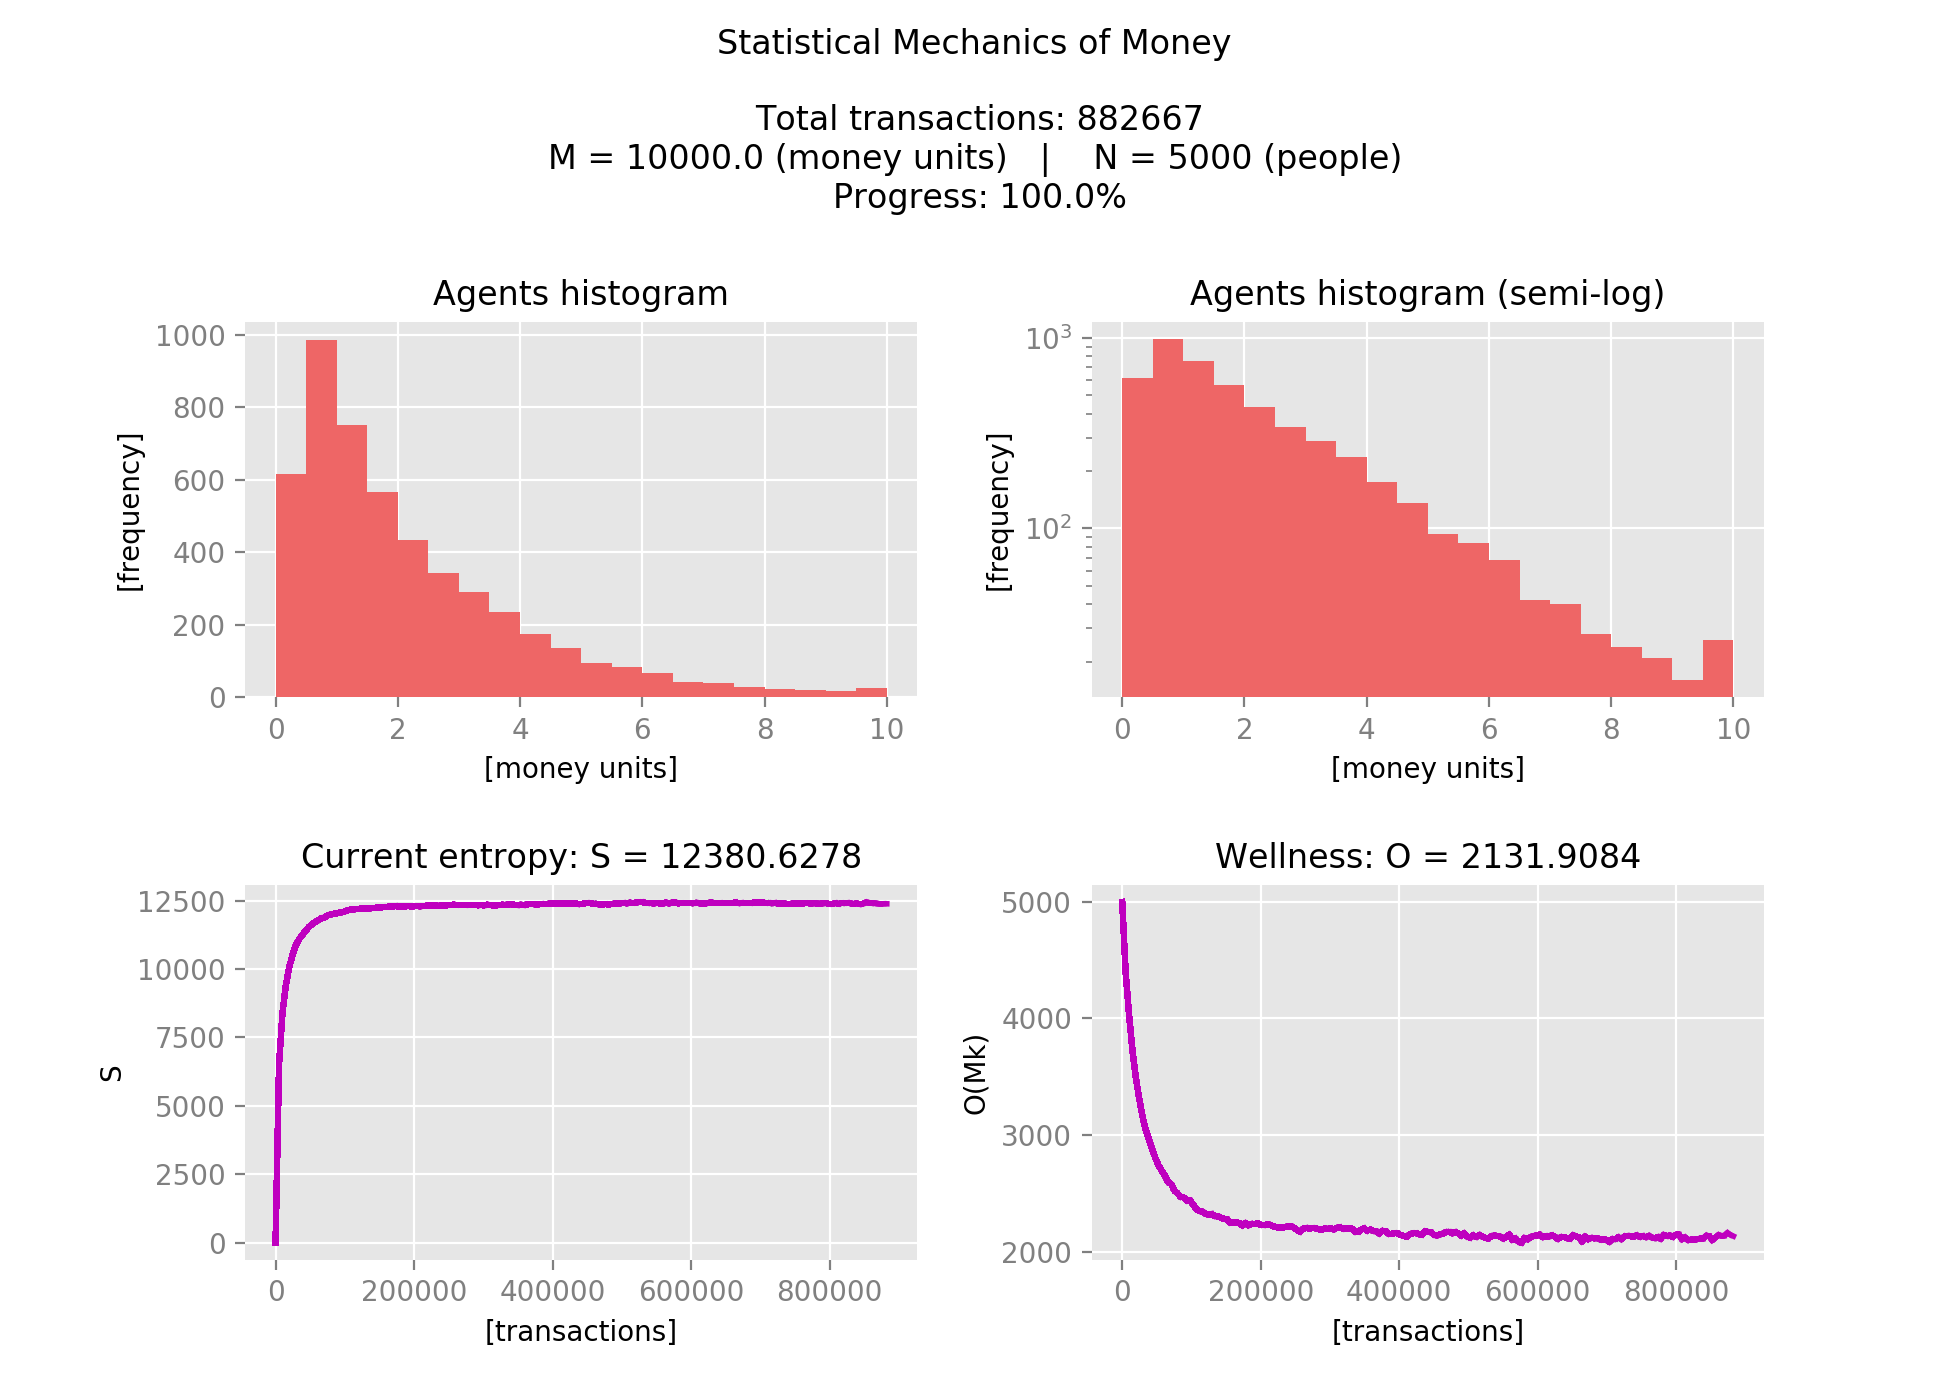

In [70]:
# WELLNESS FUNCTION - DELTA DISTRIBUTION B

mMax = 10
deltaSimulation.resetHistoricAnnexeData(C,mMax, O1_b)
deltaSimulation.setMMax(mMax)
deploySimulationPlot(deltaSimulation)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


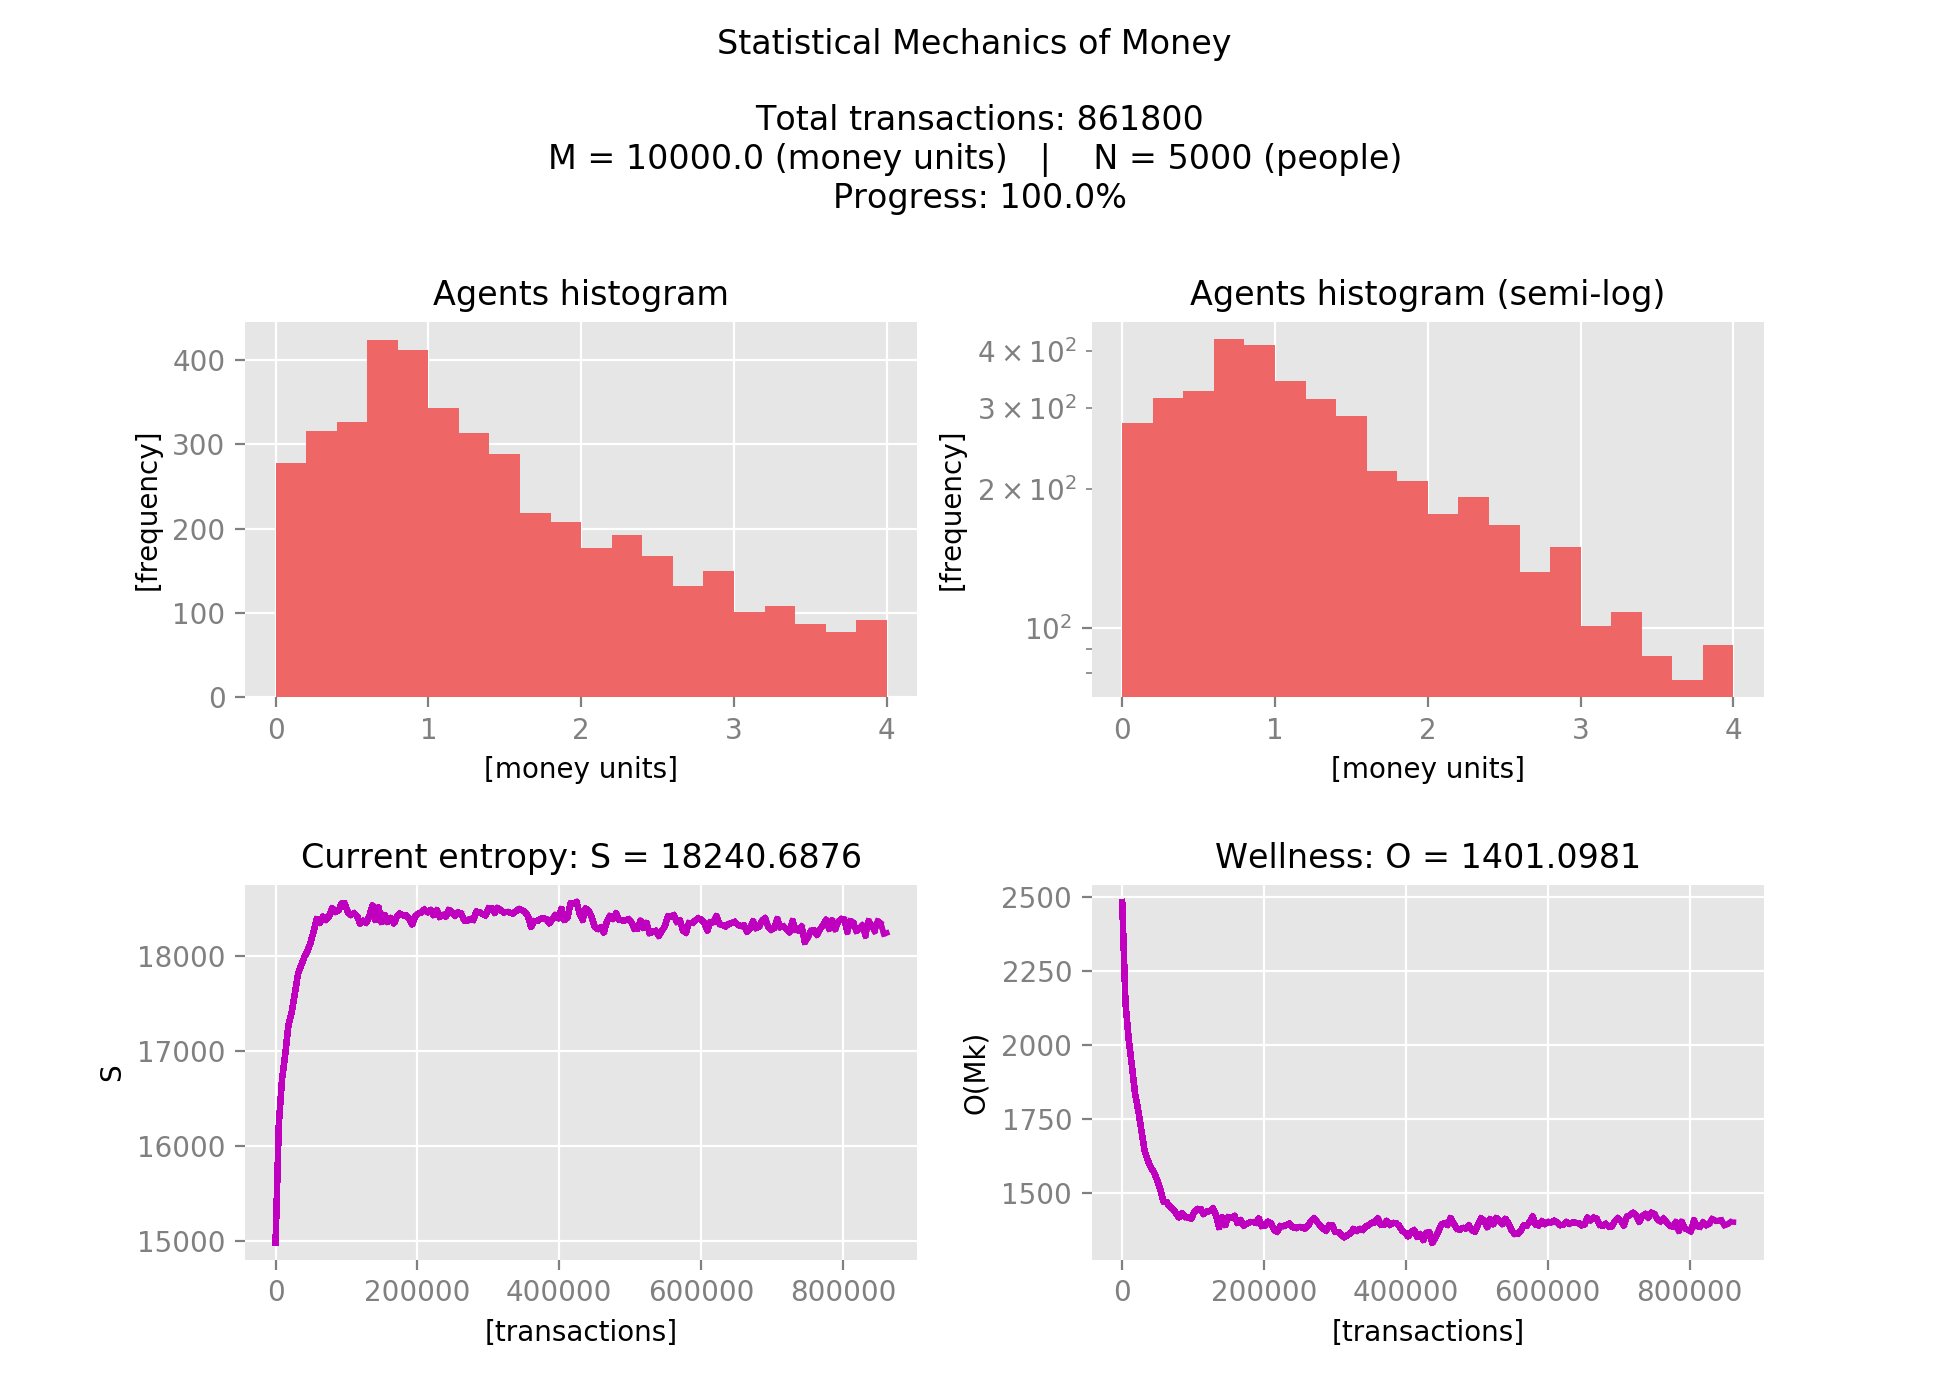

In [71]:
# WELLNESS FUNCTION - UNIFORM DISTRIBUTION A

mMax = 4
uniformSimulation.resetHistoricAnnexeData(C,mMax, O1_a)
uniformSimulation.setMMax(mMax)
deploySimulationPlot(uniformSimulation)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


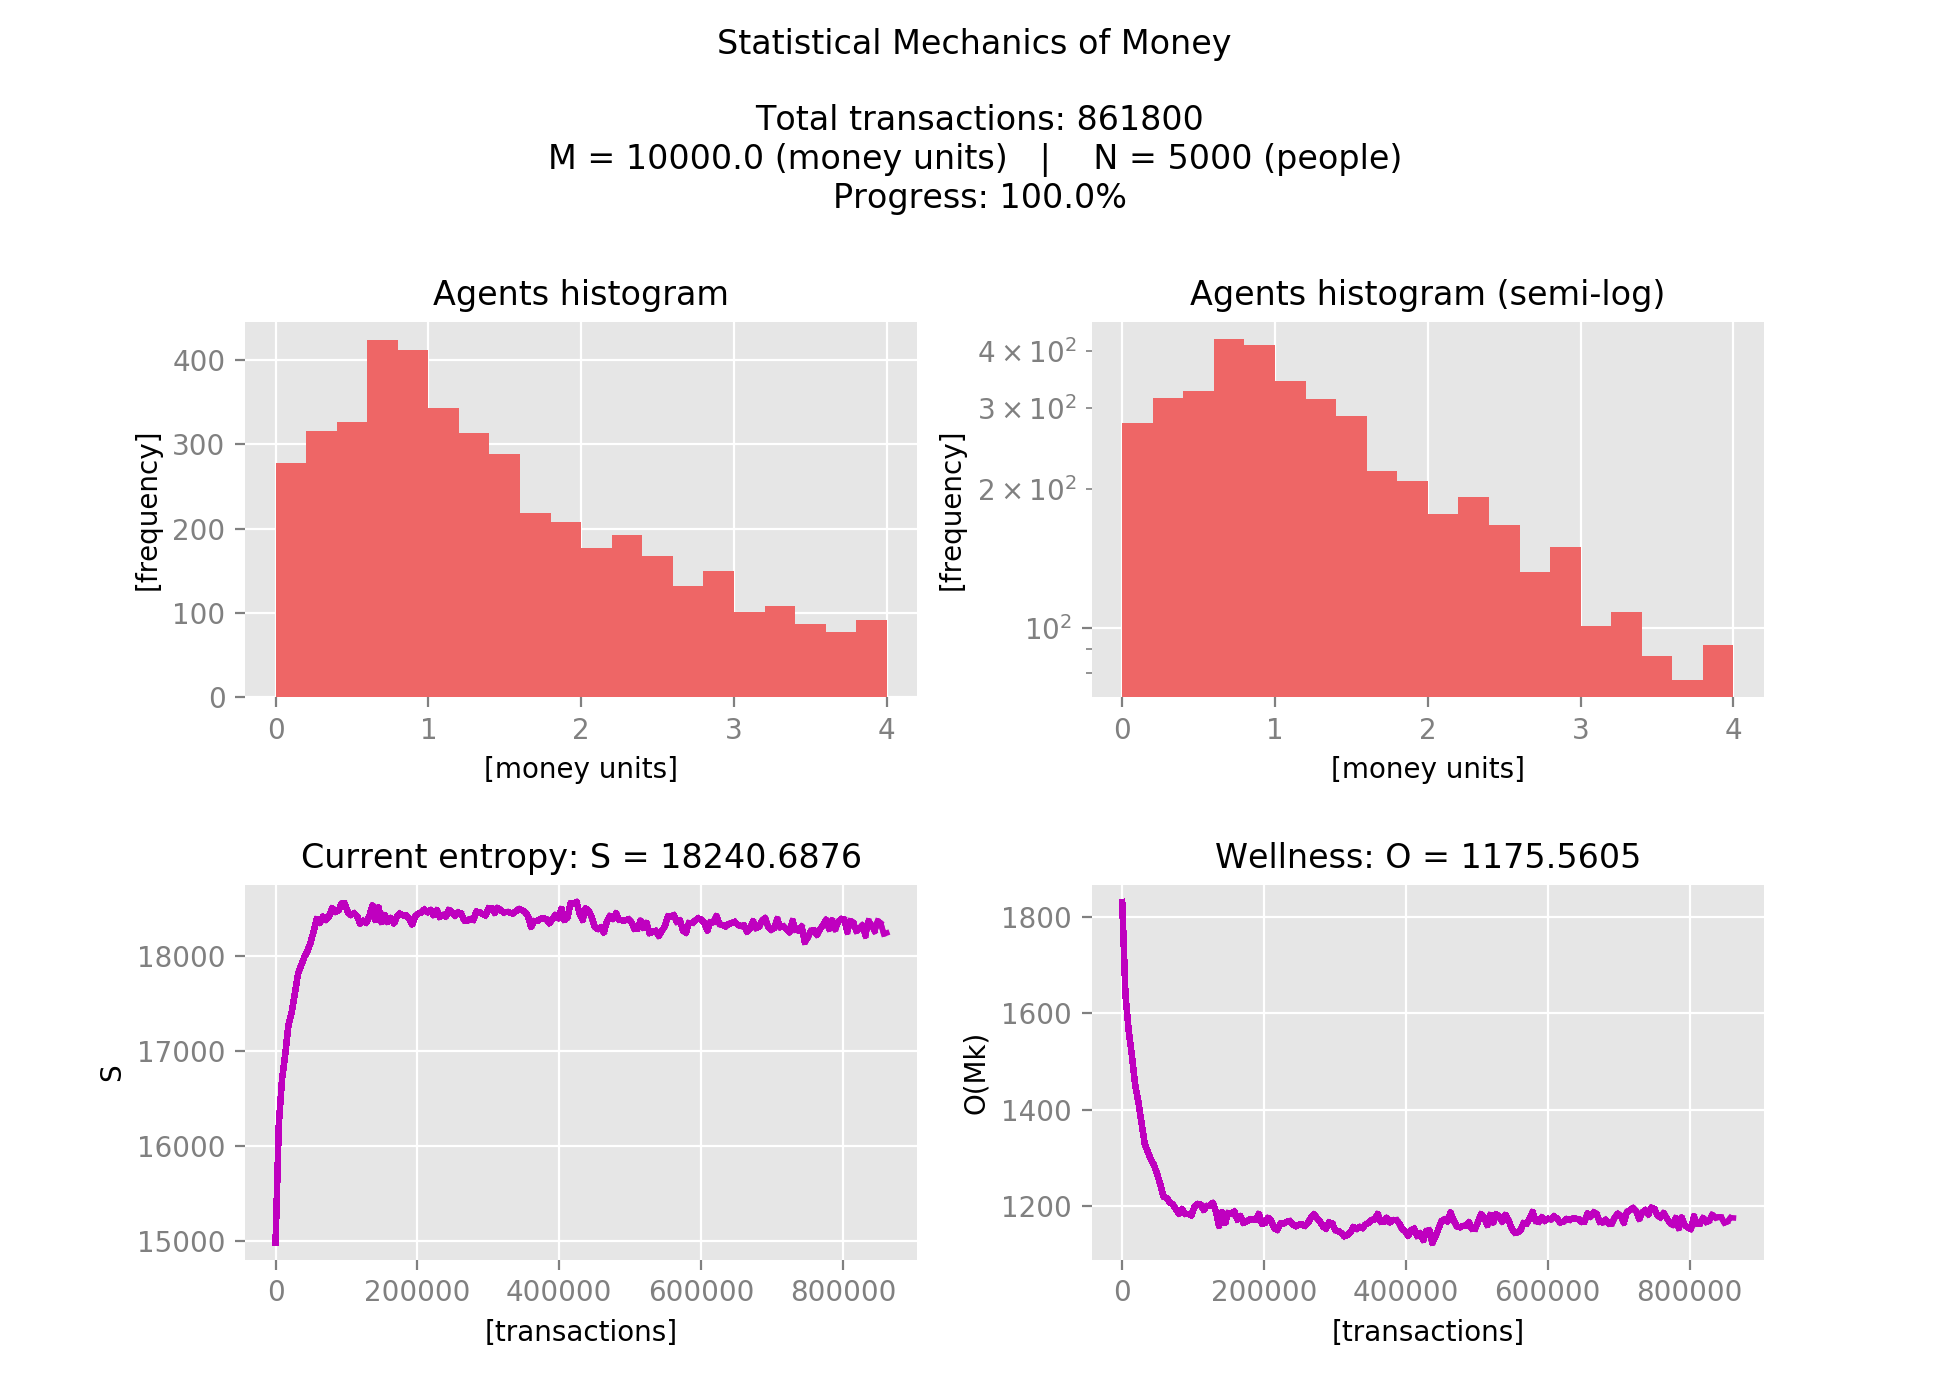

In [72]:
# WELLNESS FUNCTION - UNIFORM DISTRIBUTION B

mMax = 4
uniformSimulation.resetHistoricAnnexeData(C,mMax, O1_b)
uniformSimulation.setMMax(mMax)
deploySimulationPlot(uniformSimulation)

In [ ]:
# Second part of the mechanical statistics course final project

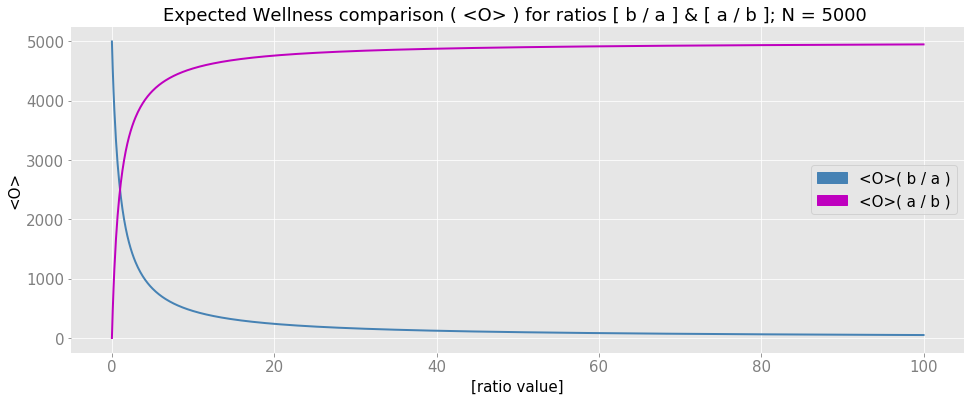

In [57]:
N = 5000
def expectedWellnessAlpha(ratioAlpha):
    return N/(1+ratioAlpha)

def expectedWellnessBeta(ratioBeta):
    return N*ratioBeta/(ratioBeta + 1)

ratioMin = 0
ratioMax = 100
pointsNum = 1000
ratio = np.linspace(ratioMin, ratioMax, pointsNum)

# expectedWellness = expectedWellnessAlpha(ratio)
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(16,6))

plt.plot(ratio, expectedWellnessAlpha(ratio), 'steelblue')
plt.plot(ratio, expectedWellnessBeta(ratio), 'm')

S1_patch = mpatches.Patch(color='steelblue', label='<O>( b / a )')
S2_patch = mpatches.Patch(color='m', label='<O>( a / b )')
plt.legend(handles=[S1_patch,S2_patch])
plt.xlabel('[ratio value]')
plt.ylabel('<O>')
plt.title('Expected Wellness comparison ( <O> ) for ratios [ b / a ] & [ a / b ]; N = 5000 ')
plt.show()


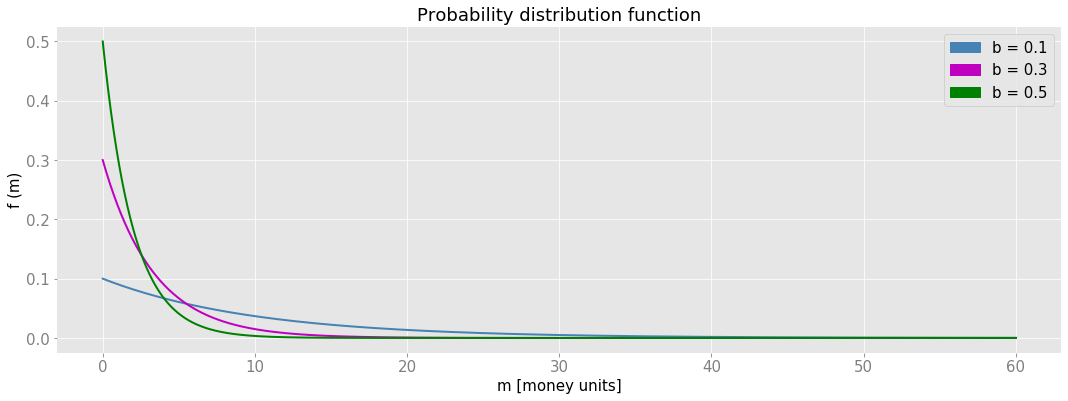

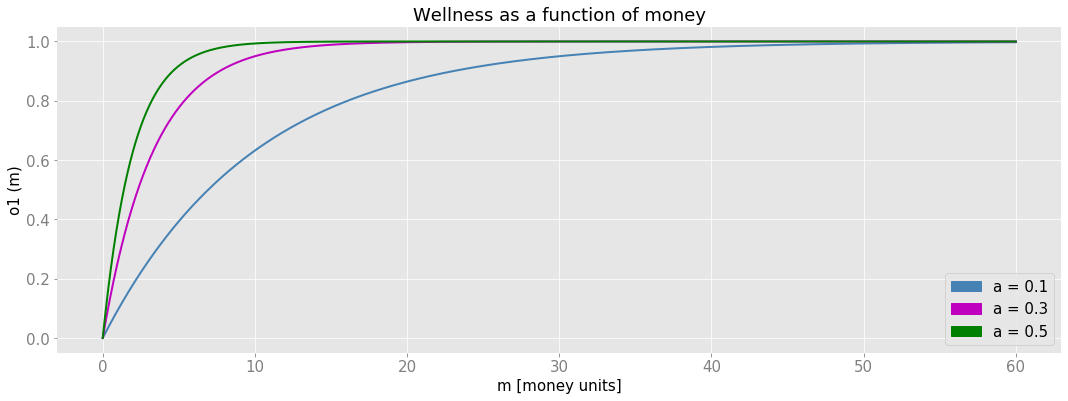

In [137]:
m = np.linspace(0,60, 1000)

b1 = 0.1
f1 = b1*np.exp(-b1*m)

b2 = 0.3
f2 = b2*np.exp(-b2*m)

b3 = 0.5
f3 = b3*np.exp(-b3*m)


a1 = 0.1
o1_1 = 1 - np.exp(-a1*m)

a2 = 0.3
o1_2 = 1 - np.exp(-a2*m)

a3 = 0.5
o1_3 = 1 - np.exp(-a3*m)

fig = plt.figure(figsize=(18,6))

plt.plot(m,f1,'steelblue')
plt.plot(m,f2,'m')
plt.plot(m,f3,'g')

plt.ylabel('f (m)')
plt.xlabel('m [money units]')
plt.title('Probability distribution function')


S1_patch = mpatches.Patch(color='steelblue', label='b = 0.1')
S2_patch = mpatches.Patch(color='m', label='b = 0.3')
S3_patch = mpatches.Patch(color='g', label='b = 0.5')

plt.legend(handles=[S1_patch,S2_patch,S3_patch])

plt.show()



fig = plt.figure(figsize=(18,6))

plt.plot(m,o1_1,'steelblue')
plt.plot(m,o1_2,'m')
plt.plot(m,o1_3,'g')

plt.ylabel('o1 (m)')
plt.xlabel('m [money units]')
plt.title('Wellness as a function of money')

S1_patch = mpatches.Patch(color='steelblue', label='a = 0.1')
S2_patch = mpatches.Patch(color='m', label='a = 0.3')
S3_patch = mpatches.Patch(color='g', label='a = 0.5')

plt.legend(handles=[S1_patch,S2_patch,S3_patch])

plt.show()



Text(0.5, 0, 'm [money units]')

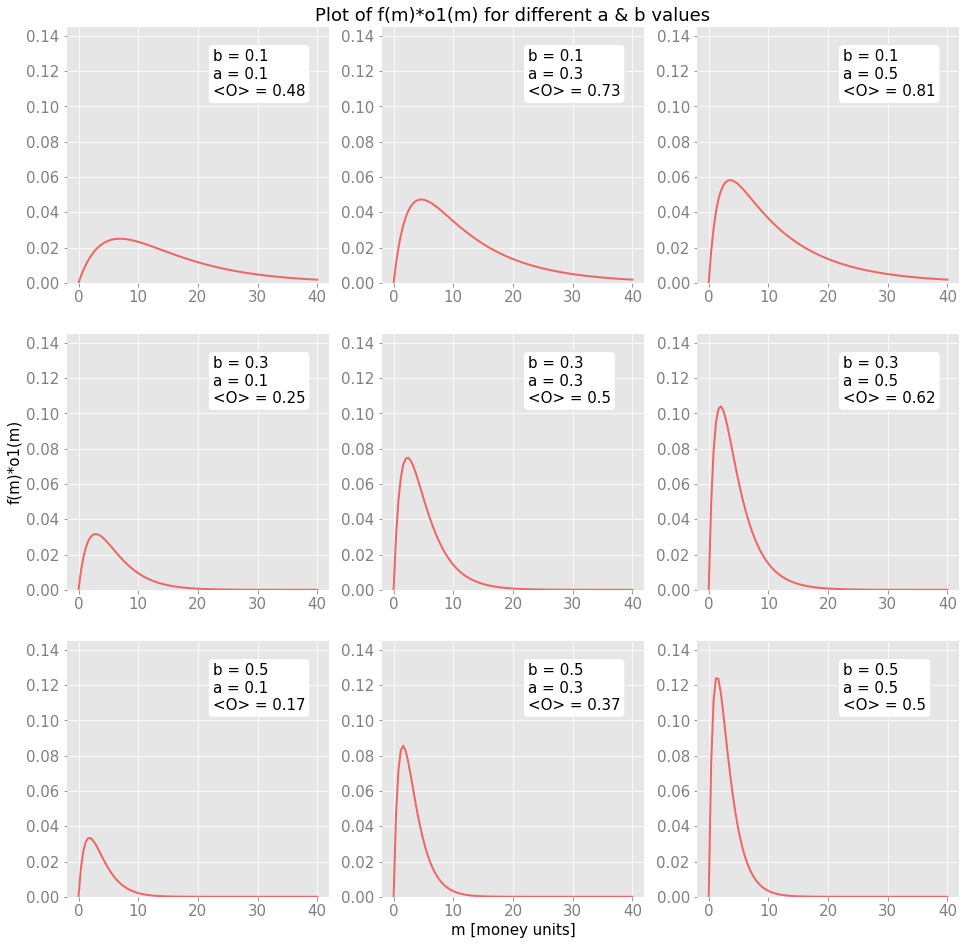

In [165]:
fig = plt.figure(figsize=(16,16))

gs = fig.add_gridspec(3, 3)

m = np.linspace(0,40.000001, 100)

b1 = 0.1
b2 = 0.3
b3 = 0.5

a1 = 0.1
a2 = 0.3
a3 = 0.5

f1 = b1*np.exp(-b1*m)
f2 = b2*np.exp(-b2*m)
f3 = b3*np.exp(-b3*m)

o1_1 = 1 - np.exp(-a1*m)
o1_2 = 1 - np.exp(-a2*m)
o1_3 = 1 - np.exp(-a3*m)

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax02 = fig.add_subplot(gs[0, 2])

ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])
ax12 = fig.add_subplot(gs[1, 2])

ax20 = fig.add_subplot(gs[2, 0])
ax21 = fig.add_subplot(gs[2, 1])
ax22 = fig.add_subplot(gs[2, 2])

f1o1_1 = f1*o1_1
f1o1_2 = f1*o1_2
f1o1_3 = f1*o1_3

f2o1_1 = f2*o1_1
f2o1_2 = f2*o1_2
f2o1_3 = f2*o1_3

f3o1_1 = f3*o1_1
f3o1_2 = f3*o1_2
f3o1_3 = f3*o1_3

ax00.plot(m,f1o1_1)
ax01.plot(m,f1o1_2)
ax02.plot(m,f1o1_3)
    
ax10.plot(m,f2o1_1)
ax11.plot(m,f2o1_2)
ax12.plot(m,f2o1_3)
    
ax20.plot(m,f3o1_1)
ax21.plot(m,f3o1_2)
ax22.plot(m,f3o1_3)


legendX = 0.106
legendY = 22.5


expectedO11 = np.trapz(f1o1_1, x=m)
expectedO12 = np.trapz(f1o1_2, x=m)
expectedO13 = np.trapz(f1o1_3, x=m)

expectedO21 = np.trapz(f2o1_1, x=m)
expectedO22 = np.trapz(f2o1_2, x=m)
expectedO23 = np.trapz(f2o1_3, x=m)

expectedO31 = np.trapz(f3o1_1, x=m)
expectedO32 = np.trapz(f3o1_2, x=m)
expectedO33 = np.trapz(f3o1_3, x=m)

props = dict(boxstyle='round', facecolor='white', alpha=1)

ax00.text(legendY,legendX,'b = ' + str(b1) + '\na = ' + str(a1) + '\n<O> = ' + str(np.round(expectedO11,2)), bbox=props)
ax01.text(legendY,legendX,'b = ' + str(b1) + '\na = ' + str(a2) + '\n<O> = ' + str(np.round(expectedO12,2)), bbox=props)
ax02.text(legendY,legendX,'b = ' + str(b1) + '\na = ' + str(a3) + '\n<O> = ' + str(np.round(expectedO13,2)), bbox=props)

ax10.text(legendY,legendX,'b = ' + str(b2) + '\na = ' + str(a1) + '\n<O> = ' + str(np.round(expectedO21,2)), bbox=props)
ax11.text(legendY,legendX,'b = ' + str(b2) + '\na = ' + str(a2) + '\n<O> = ' + str(np.round(expectedO22,2)), bbox=props)
ax12.text(legendY,legendX,'b = ' + str(b2) + '\na = ' + str(a3) + '\n<O> = ' + str(np.round(expectedO23,2)), bbox=props)

ax20.text(legendY,legendX,'b = ' + str(b3) + '\na = ' + str(a1) + '\n<O> = ' + str(np.round(expectedO31,2)), bbox=props)
ax21.text(legendY,legendX,'b = ' + str(b3) + '\na = ' + str(a2) + '\n<O> = ' + str(np.round(expectedO32,2)), bbox=props)
ax22.text(legendY,legendX,'b = ' + str(b3) + '\na = ' + str(a3) + '\n<O> = ' + str(np.round(expectedO33,2)), bbox=props)

yMax = 0.145

ax00.set_ylim([0,yMax])
ax01.set_ylim([0,yMax])
ax02.set_ylim([0,yMax])

ax10.set_ylim([0,yMax])
ax11.set_ylim([0,yMax])
ax12.set_ylim([0,yMax])

ax20.set_ylim([0,yMax])
ax21.set_ylim([0,yMax])
ax22.set_ylim([0,yMax])


np.trapz([1,2,3], x=[4,6,8])



ax01.set_title('Plot of f(m)*o1(m) for different a & b values')
ax10.set_ylabel('f(m)*o1(m)')
ax21.set_xlabel('m [money units]')


In [ ]:
N = 5000
def expectedWellnessAlpha(ratioAlpha):
    return N/(1+ratioAlpha)

def expectedWellnessBeta(ratioBeta):
    return N*ratioBeta/(ratioBeta + 1)

ratioMin = 0
ratioMax = 100
pointsNum = 1000
ratio = np.linspace(ratioMin, ratioMax, pointsNum)

# expectedWellness = expectedWellnessAlpha(ratio)
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(16,6))

plt.plot(ratio, expectedWellnessAlpha(ratio), 'steelblue')
plt.plot(ratio, expectedWellnessBeta(ratio), 'm')

S1_patch = mpatches.Patch(color='steelblue', label='<O>( b / a )')
S2_patch = mpatches.Patch(color='m', label='<O>( a / b )')
plt.legend(handles=[S1_patch,S2_patch])
plt.xlabel('[ratio value]')
plt.ylabel('<O>')
plt.title('Expected Wellness comparison ( <O> ) for ratios [ b / a ] & [ a / b ]; N = 5000 ')
plt.show()

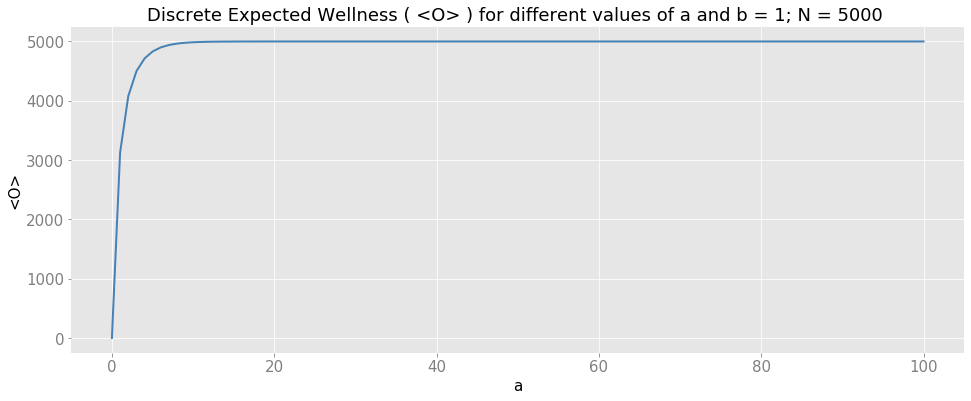

In [245]:
def discreteWellness(N,a,b,classInterval, C):
    Ac = discreteNormalization(b,classInterval,C)
    return N*(1 - Ac*((1-np.exp(-(a+b)*classInterval*(C+1)))/(1-np.exp(-(a+b)*classInterval))) + Ac)
    
def discreteNormalization(b,classInterval,C):
    return (np.exp(b*classInterval) - 1)/(1 - np.exp(-b*classInterval*C))


N = 5000
mMax = 10
C = 20
classInterval = mMax/C
a1 = np.linspace(0,100,100)


O1 = discreteWellness(N,a1,b,classInterval, C)



plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(16,6))

plt.plot(a, O1, 'steelblue')


S1_patch = mpatches.Patch(color='steelblue', label='a belongs to [0,100]')


plt.xlabel('a')
plt.ylabel('<O>')
plt.title('Discrete Expected Wellness ( <O> ) for different values of a and b = ' + str(b) + '; N = 5000 ')
plt.show()



In [ ]:
M = 10000
C = 20
N = 5000
avg0 = M/N
